In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_i oficial data

In [3]:
xls = pd.ExcelFile(
    "../../../data/raw/partner_i-Oficial/DB_Master_CP1_latest v03.06.xlsx",
    engine="openpyxl",
)

<IPython.core.display.Javascript object>

In [4]:
xls.sheet_names

['DB0 Forno',
 'Base',
 'DB1 Combustíveis',
 'Sheet8',
 'DB2 Clínquer',
 'Base auxiliar',
 'DB3 Cimento Production',
 'DB3 Cimento Shipping',
 'Sheet2']

<IPython.core.display.Javascript object>

In [5]:
df = pd.read_excel(xls, "DB3 Cimento Shipping", header=[1, 2])

<IPython.core.display.Javascript object>

In [6]:
df

Unnamed: 0_level_0        Date       Time        Date  \
                        Unnamed: 0_level_1  Production Production Measurement   
0                          Unit of measure  dd/mm/yyyy   hh:mm:ss  dd/mm/yyyy   
1     Frequency of data collection per day         NaN        NaN         NaN   
2                            Sl No. Method         NaN        NaN         NaN   
3                                        1  02/01/2020   00:00:00  02/01/2020   
4                                        2  03/01/2020   00:00:00  03/01/2020   
...                                    ...         ...        ...         ...   
1264                                  1262  22/04/2022   00:00:00  22/04/2022   
1265                                  1263  25/04/2022   00:00:00  25/04/2022   
1266                                  1264  27/04/2022   00:00:00  27/04/2022   
1267                                  1265  28/04/2022   00:00:00  28/04/2022   
1268                                  1266  02/05/2022   00:00:00  02/05/2022   

            Time   Mill temperature         Mill configuration  \
     Measurement Unnamed: 5_level_1 Roller/Ball (with details)   
0       hh:mm:ss                  K                        NaN   
1            NaN                NaN                        NaN   
2            NaN                NaN                        NaN   
3       00:00:00            NO DATA                  Ball mill   
4       00:00:00                NaN                  Ball mill   
...          ...                ...                        ...   
1264    00:00:00                NaN                  Ball mill   
1265    00:00:00                NaN                  Ball mill   
1266    00:00:00                NaN                  Ball mill   
1267    00:00:00                NaN                  Ball mill   
1268    00:00:00                NaN                  Ball mill   

     Cement Temperature  Clinker           ...           Properties  \
     Unnamed: 7_level_1      CaO      SO2  ... Initial setting time   
0                     K        %        %  ...                  min   
1                   NaN        0        0  ...                    1   
2                   NaN  XRD/XRF  XRD/XRF  ...               Manual   
3               NO DATA      NaN      NaN  ...                  130   
4                   NaN      NaN      NaN  ...                  135   
...                 ...      ...      ...  ...                  ...   
1264                NaN      NaN      NaN  ...                  170   
1265                NaN      NaN      NaN  ...                  150   
1266                NaN      NaN      NaN  ...                  140   
1267                NaN      NaN      NaN  ...                  165   
1268                NaN      NaN      NaN  ...                  140   

                                                            \
     Final setting time Density 1 day Compressive strength   
0                   min   g/cm3                        MPa   
1                     1       1                          1   
2                Manual  Manual                     Manual   
3                   190    3.06                        NaN   
4                   195    3.06                       27.8   
...                 ...     ...                        ...   
1264                230    3.08                        NaN   
1265                210    3.06                        NaN   
1266                200    3.06                        NaN   
1267                225    3.08                        NaN   
1268                195    3.06                        NaN   

                                                            \
     3 day Compressive strength 7 day Compressive strength   
0                           MPa                        MPa   
1                             1                          1   
2                        Manual                     Manual   
3                          36.5                         41   
4       

<IPython.core.display.Javascript object>

In [7]:
df["Properties"]

Blaine Initial setting time Final setting time Density  \
0      m2/kg                  min                min   g/cm3   
1          1                    1                  1       1   
2     Manual               Manual             Manual  Manual   
3       5180                  130                190    3.06   
4       5510                  135                195    3.06   
...      ...                  ...                ...     ...   
1264    5350                  170                230    3.08   
1265    5730                  150                210    3.06   
1266    5580                  140                200    3.06   
1267    5240                  165                225    3.08   
1268    5600                  140                195    3.06   

     1 day Compressive strength 3 day Compressive strength  \
0                           MPa                        MPa   
1                             1                          1   
2                        Manual                     Manual   
3                           NaN                       36.5   
4                          27.8                       35.9   
...                         ...                        ...   
1264                        NaN                       26.7   
1265                        NaN                       38.9   
1266                        NaN                       38.1   
1267                        NaN                       26.6   
1268                        NaN                       37.6   

     7 day Compressive strength 28 day Compressive strength    #200    #325  \
0                           MPa                         MPa     NaN     NaN   
1                             1                           1       1       1   
2                        Manual                      Manual  Manual  Manual   
3                            41                        46.4       0     0.8   
4                          40.1                        43.9       0     0.4   
...                         ...                         ...     ...     ...   
1264                       29.7                         NaN     0.5     5.3   
1265                         43                         NaN       0       1   
1266                       42.2                         NaN     1.1    1.04   
1267                       30.3                         NaN     0.8     8.4   
1268                       41.5                         NaN       0     1.1   

        #400  
0        NaN  
1          1  
2     Manual  
3        1.5  
4        0.8  
...      ...  
1264     NaN  
1265     2.3  
1266    1.08  
1267     NaN  
1268     2.3  

[1269 rows x 11 columns]

<IPython.core.display.Javascript object>

In [8]:
df["Composition"]

CaO      MgO     Na2O    Al2O3     SiO2      SO3      K2O     TiO2  \
0           %        %        %        %        %        %        %        %   
1           1        1        1        1        1        1        1        0   
2         XRF      XRF      XRF      XRF      XRF      XRF      XRF      XRF   
3      60.008  3.67285  0.19218  4.27263  18.5564  4.43558  1.21612  NO DATA   
4     59.8274  3.71899  0.18423  4.25718  18.6161  4.42556  1.19938      NaN   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1264  58.5544  3.64635  0.23071  4.28116  18.1401  3.72903  1.17385      NaN   
1265  59.6292  4.01784  0.22137  4.37811   18.885  3.99234  1.22936      NaN   
1266  58.4695  3.77865  0.20256  4.25967  17.7542  3.73452  1.16627      NaN   
1267  57.6948  3.60826  0.23389  4.36295  17.9353  3.35408  1.23692      NaN   
1268  58.6071  3.95428  0.19921  4.25052  17.9601  3.72269  1.22611      NaN   

        Fe2O3  Ca(OH)2  ... Anhydrite Calcite Dolimite Quartz Muscovite  \
0           %        %  ...         %       %        %      %         %   
1           1        0  ...         1       1        1      1         1   
2         XRF      XRF  ...       XRD     XRD      XRD    XRD       XRD   
3     2.79746  NO DATA  ...         0    4.83     0.04   0.43         0   
4      2.7663      NaN  ...         0    4.98     0.23   0.44         0   
...       ...      ...  ...       ...     ...      ...    ...       ...   
1264  2.87785      NaN  ...      0.07   18.27     2.73   2.16         0   
1265  3.07699      NaN  ...         0   13.58     1.98   1.04         0   
1266  2.98577      NaN  ...      0.14   20.13     1.93   2.63         0   
1267   2.9603      NaN  ...      0.09   20.78     2.11   2.75         0   
1268  3.02348      NaN  ...      0.07   20.51     2.19   2.95         0   

     %Gypsum %Limestone %Clinker Dehydration           Remarks  
0          %          %        %           %               NaN  
1          1          1        1           1                 1  
2        XRD        XRD      XRD         XRD            Manual  
3       7.14       5.42    86.81         NaN  CPIIF40 Expedido  
4       6.72       5.76     86.8         NaN   CPVARI Expedido  
...      ...        ...      ...         ...               ...  
1264    5.39      23.18    70.49        25.4  CPIIF32 Expedido  
1265    4.55      16.61    78.02       49.39  CPIIF40 Expedido  
1266    5.66      24.72    68.59       40.99  CPIIF40 Expedido  
1267    5.59      25.71    67.82       42.21  CPIIF32 Expedido  
1268    5.23      25.72    68.14       47.04  CPIIF40 Expedido  

[1269 rows x 42 columns]

<IPython.core.display.Javascript object>

In [9]:
df["Date"]

Production Measurement
0     dd/mm/yyyy  dd/mm/yyyy
1            NaN         NaN
2            NaN         NaN
3     02/01/2020  02/01/2020
4     03/01/2020  03/01/2020
...          ...         ...
1264  22/04/2022  22/04/2022
1265  25/04/2022  25/04/2022
1266  27/04/2022  27/04/2022
1267  28/04/2022  28/04/2022
1268  02/05/2022  02/05/2022

[1269 rows x 2 columns]

<IPython.core.display.Javascript object>

In [10]:
df["Time"]

Production Measurement
0      hh:mm:ss    hh:mm:ss
1           NaN         NaN
2           NaN         NaN
3      00:00:00    00:00:00
4      00:00:00    00:00:00
...         ...         ...
1264   00:00:00    00:00:00
1265   00:00:00    00:00:00
1266   00:00:00    00:00:00
1267   00:00:00    00:00:00
1268   00:00:00    00:00:00

[1269 rows x 2 columns]

<IPython.core.display.Javascript object>

In [11]:
df = pd.concat([df["Date"], df["Time"], df["Composition"], df["Properties"]], axis=1)

<IPython.core.display.Javascript object>

In [12]:
df = df.drop([0, 1, 2], axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [13]:
df = pd.concat(
    [
        df["Production"].iloc[:, 0],
        df["Measurement"].iloc[:, 0],
        df["Production"].iloc[:, 1].rename("Production.1"),
        df["Measurement"].iloc[:, 1].rename("Measurement.1"),
        df.drop(["Production", "Measurement"], axis=1),
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [14]:
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [15]:
# df.to_csv("../../../data/interim/partner_i-Oficial/cement-shipping.csv", index=False)
# df = pd.read_csv("../../../data/interim/partner_i-Oficial/cement-shipping.csv")

<IPython.core.display.Javascript object>

## EDA

In [16]:
df.shape

(1266, 57)

<IPython.core.display.Javascript object>

In [17]:
df.head()

Production Measurement Production.1 Measurement.1        CaO      MgO  \
0  02/01/2020  02/01/2020     00:00:00      00:00:00  60.007980  3.67285   
1  03/01/2020  03/01/2020     00:00:00      00:00:00  59.827351  3.71899   
2  06/01/2020  06/01/2020     00:00:00      00:00:00  60.376080  3.62883   
3  07/01/2020  07/01/2020     00:00:00      00:00:00  59.606731  3.64745   
4  08/01/2020  08/01/2020     00:00:00      00:00:00  60.575809  3.07521   

      Na2O    Al2O3       SiO2      SO3  ...  Initial setting time  \
0  0.19218  4.27263  18.556379  4.43558  ...                 130.0   
1  0.18423  4.25718  18.616140  4.42556  ...                 135.0   
2  0.19847  4.34362  18.869631  4.15419  ...                 130.0   
3  0.20358  4.22977  18.271490  4.42312  ...                 135.0   
4  0.19590  4.09051  17.580271  3.32406  ...                 165.0   

  Final setting time  Density 1 day Compressive strength  \
0              190.0     3.06                        NaN   
1              195.0     3.06                  27.799999   
2              180.0     3.06                        NaN   
3              195.0     3.06                  27.100000   
4              220.0     3.02                        NaN   

  3 day Compressive strength  7 day Compressive strength  \
0                  36.500000                   41.000000   
1                  35.900002                   40.099998   
2                  36.799999                   41.099998   
3                  37.000000                   40.200001   
4                  26.400000                   31.000000   

   28 day Compressive strength  #200  #325  #400  
0                    46.400002   0.0   0.8   1.5  
1                    43.900002   0.0   0.4   0.8  
2                    46.500000   0.0   0.5   1.0  
3                    43.599998   0.0   0.3   0.6  
4                    35.799999   0.5   4.3   NaN  

[5 rows x 57 columns]

<IPython.core.display.Javascript object>

In [18]:
df.tail()

Production Measurement Production.1 Measurement.1        CaO      MgO  \
1261  22/04/2022  22/04/2022     00:00:00      00:00:00  58.554359  3.64635   
1262  25/04/2022  25/04/2022     00:00:00      00:00:00  59.629230  4.01784   
1263  27/04/2022  27/04/2022     00:00:00      00:00:00  58.469471  3.77865   
1264  28/04/2022  28/04/2022     00:00:00      00:00:00  57.694752  3.60826   
1265  02/05/2022  02/05/2022     00:00:00      00:00:00  58.607109  3.95428   

         Na2O    Al2O3       SiO2      SO3  ...  Initial setting time  \
1261  0.23071  4.28116  18.140091  3.72903  ...                 170.0   
1262  0.22137  4.37811  18.885000  3.99234  ...                 150.0   
1263  0.20256  4.25967  17.754181  3.73452  ...                 140.0   
1264  0.23389  4.36295  17.935289  3.35408  ...                 165.0   
1265  0.19921  4.25052  17.960119  3.72269  ...                 140.0   

     Final setting time  Density 1 day Compressive strength  \
1261              230.0     3.08                        NaN   
1262              210.0     3.06                        NaN   
1263              200.0     3.06                        NaN   
1264              225.0     3.08                        NaN   
1265              195.0     3.06                        NaN   

     3 day Compressive strength  7 day Compressive strength  \
1261                  26.700001                   29.700001   
1262                  38.900002                   43.000000   
1263                  38.099998                   42.200001   
1264                  26.600000                   30.299999   
1265                  37.599998                   41.500000   

      28 day Compressive strength  #200  #325  #400  
1261                          NaN   0.5  5.30   NaN  
1262                          NaN   0.0  1.00  2.30  
1263                          NaN   1.1  1.04  1.08  
1264                          NaN   0.8  8.40   NaN  
1265                          NaN   0.0  1.10  2.30  

[5 rows x 57 columns]

<IPython.core.display.Javascript object>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Production                   1266 non-null   object 
 1   Measurement                  1266 non-null   object 
 2   Production.1                 1266 non-null   object 
 3   Measurement.1                1266 non-null   object 
 4   CaO                          1255 non-null   float64
 5   MgO                          1255 non-null   float64
 6   Na2O                         1255 non-null   float64
 7   Al2O3                        1255 non-null   float64
 8   SiO2                         1255 non-null   float64
 9   SO3                          1255 non-null   float64
 10  K2O                          1255 non-null   float64
 11  TiO2                         1 non-null      object 
 12  Fe2O3                        1255 non-null   float64
 13  Ca(OH)2           

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [20]:
df.dtypes.value_counts()

float64    49
object      8
dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [21]:
df.describe().transpose()

count         mean         std         min  \
CaO                          1255.0    59.703728    1.185143   51.316422   
MgO                          1255.0     2.933988    0.471289    1.642760   
Na2O                         1255.0     0.200001    0.027212    0.056230   
Al2O3                        1255.0     4.243081    0.193713    3.503430   
SiO2                         1255.0    18.338357    0.862011   14.381200   
SO3                          1255.0     3.738383    0.451708    1.967030   
K2O                          1255.0     1.198300    0.090819    0.668960   
Fe2O3                        1255.0     2.908932    0.195475    2.087810   
Total alkali as Na2O          910.0     0.948849    0.086210    0.000000   
Soundness                    1167.0     0.011183    0.102944    0.000000   
LOI                          1257.0     6.404232    2.489671    0.880000   
IR                           1257.0     2.851846    1.174229    0.630000   
Alite total                  1242.0    52.694622    6.002163    4.650000   
Belite total                  825.0    11.592582    2.269660    5.120000   
Belite alpha                 1242.0     1.911916    0.967919    0.000000   
Belite beta                  1242.0     8.912778    2.060325    3.380000   
Belite gamma                 1242.0     0.324082    0.519927    0.000000   
Ferrite                      1242.0     8.192464    1.227912    4.750000   
Aluminate                    1242.0     4.136924    1.141605    2.200000   
Aluminate cubic              1242.0     3.197536    0.625225    1.480000   
Aluminate orto               1242.0     0.941747    0.898360    0.010000   
Free lime                    1242.0     0.581320    0.366170    0.000000   
Portlandite                  1242.0     1.289388    0.810519    0.090000   
Periclase                    1242.0     1.757770    0.597152    0.290000   
Arcanite                     1242.0     0.850692    0.894138    0.000000   
Aphthalite                   1242.0     0.518712    0.209315    0.000000   
Langbeinite                   389.0     0.048329    0.043036    0.000000   
Gypsum                       1241.0     1.743280    1.187910    0.080000   
Bassanite                    1241.0     2.774416    1.469961    0.000000   
Anhydrite                    1241.0     0.074093    0.093115    0.000000   
Calcite                      1241.0    11.645214    6.131276    0.820000   
Dolimite                     1241.0     1.192869    0.852400    0.000000   
Quartz                       1241.0     1.133151    0.653740    0.000000   
Muscovite                    1241.0     0.000000    0.000000    0.000000   
%Gypsum                      1210.0     4.576289    1.073776    1.190000   
%Limestone                   1210.0    14.118438    7.225021    1.040000   
%Clinker                     1210.0    80.597777    6.928548   62.669998   
Dehydration                   823.0    52.350632   20.826086    6.540000   
Blaine                       1259.0  5479.047657  296.981097  598.000000   
Initial setting time         1260.0   145.787302   12.113214  110.000000   
Final setting time           1260.0   202.735714   12.600005  125.000000   
Density                      1260.0     3.057222    0.018560    2.900000   
1 day Compressive strength    231.0    27.413853    1.142225   25.299999   
3 day Compressive strength   1260.0    33.935000    4.846335   24.000000   
7 day Compressive strength   1260.0    38.220873    5.002487   28.000000   
28 day Compressive strength  1234.0    43.522172    5.041295   32.400002   
#200                         1260.0     0.207905    0.249307    0.000000   
#325                         1260.0     2.598643    4.540115    0.060000   
#400                          838.0     2.119547    6.860414    0.290000   

                                     25%          50%          75%  \
CaO                            59.325249    59.855709    60.364368   
MgO                             2.564265     2.925290     3.264745   
Na2O               

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [22]:
df.describe(exclude="number").T

count unique               top  freq
Production     1266    659        24/02/2020     3
Measurement    1266    659        24/02/2020     3
Production.1   1266      1          00:00:00  1266
Measurement.1  1266      1          00:00:00  1266
TiO2              1      1           NO DATA     1
Ca(OH)2           1      1           NO DATA     1
CaCO3             1      1           NO DATA     1
Remarks        1266      3  CPIIF40 Expedido   611

<IPython.core.display.Javascript object>

In [23]:
df["Remarks"].unique()

array(['CPIIF40 Expedido', 'CPVARI Expedido', 'CPIIF32 Expedido'],
      dtype=object)

<IPython.core.display.Javascript object>

In [24]:
df.groupby(["Remarks"]).size()

Remarks
CPIIF32 Expedido    421
CPIIF40 Expedido    611
CPVARI Expedido     234
dtype: int64

<IPython.core.display.Javascript object>

In [25]:
dates = pd.to_datetime(
    df["Production"] + " " + df["Production.1"], format="%d/%m/%Y %H:%M:%S"
)

<IPython.core.display.Javascript object>

In [26]:
print(dates.min())
print(dates.max())

2020-01-02 00:00:00
2022-05-03 00:00:00


<IPython.core.display.Javascript object>

In [27]:
dates

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
1261   2022-04-22
1262   2022-04-25
1263   2022-04-27
1264   2022-04-28
1265   2022-05-02
Length: 1266, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [28]:
df["Production"].unique().shape

(659,)

<IPython.core.display.Javascript object>

In [29]:
(df["Production"] == df["Measurement"]).all()

True

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

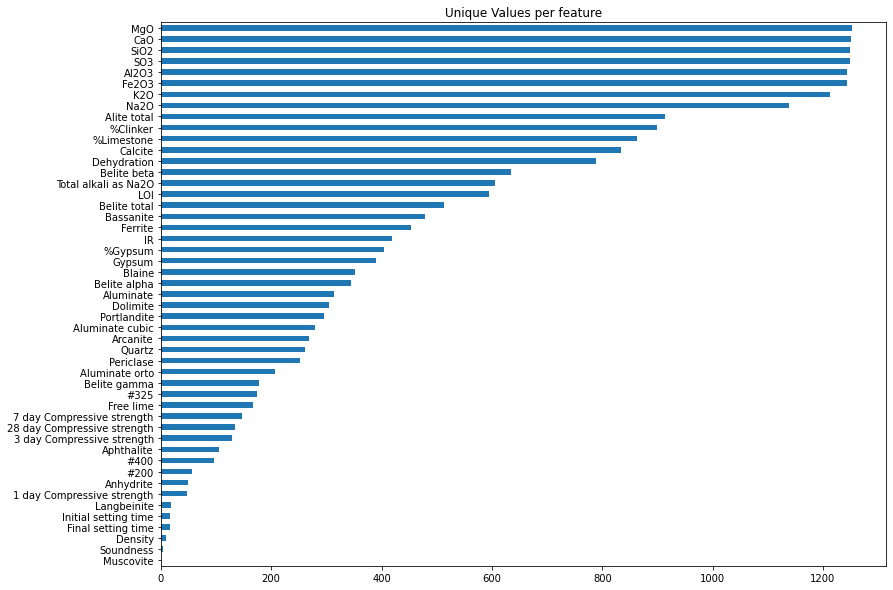

<IPython.core.display.Javascript object>

In [30]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Production.1'),
  Text(1, 0, 'Measurement.1'),
  Text(2, 0, 'TiO2'),
  Text(3, 0, 'Ca(OH)2'),
  Text(4, 0, 'CaCO3'),
  Text(5, 0, 'Remarks'),
  Text(6, 0, 'Production'),
  Text(7, 0, 'Measurement')])

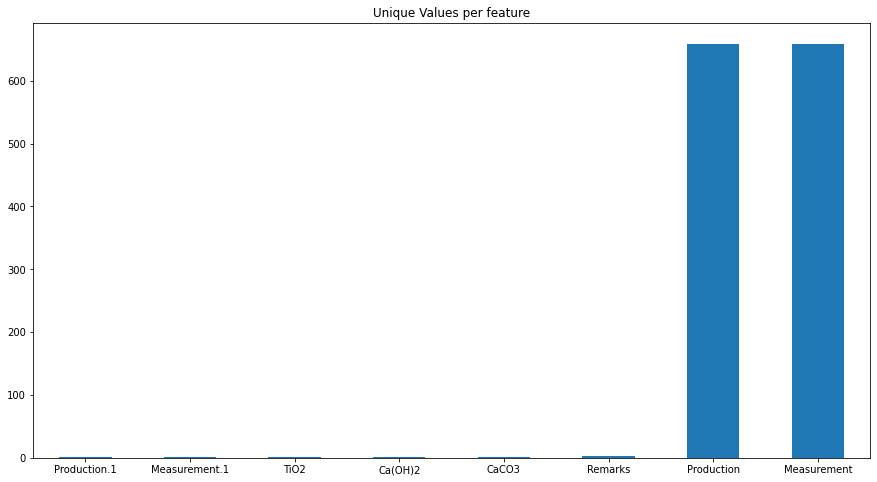

<IPython.core.display.Javascript object>

In [31]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [32]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 52 variables with missing values from a total of 57


<IPython.core.display.Javascript object>

In [33]:
df.isna().any()

Production                     False
Measurement                    False
Production.1                   False
Measurement.1                  False
CaO                             True
MgO                             True
Na2O                            True
Al2O3                           True
SiO2                            True
SO3                             True
K2O                             True
TiO2                            True
Fe2O3                           True
Ca(OH)2                         True
CaCO3                           True
Total alkali as Na2O            True
Soundness                       True
LOI                             True
IR                              True
Alite total                     True
Belite total                    True
Belite alpha                    True
Belite beta                     True
Belite gamma                    True
Ferrite                         True
Aluminate                       True
Aluminate cubic                 True
A

<IPython.core.display.Javascript object>

In [34]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [35]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  8316 missing values.


<IPython.core.display.Javascript object>

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

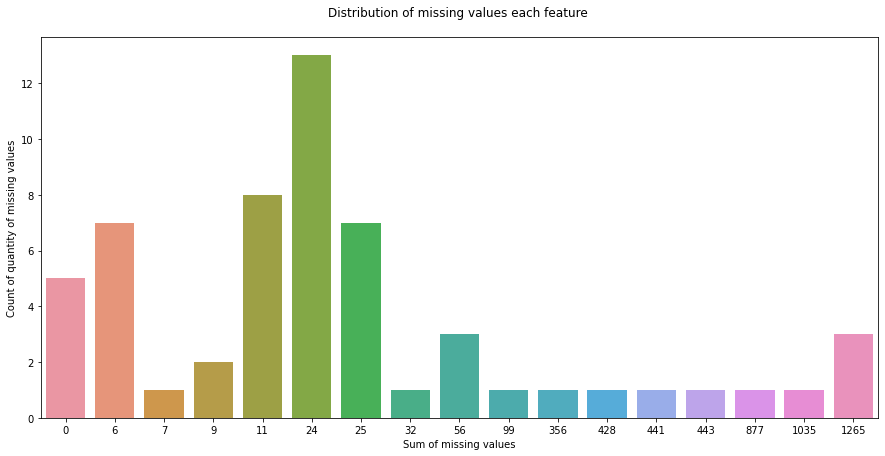

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 57 artists>

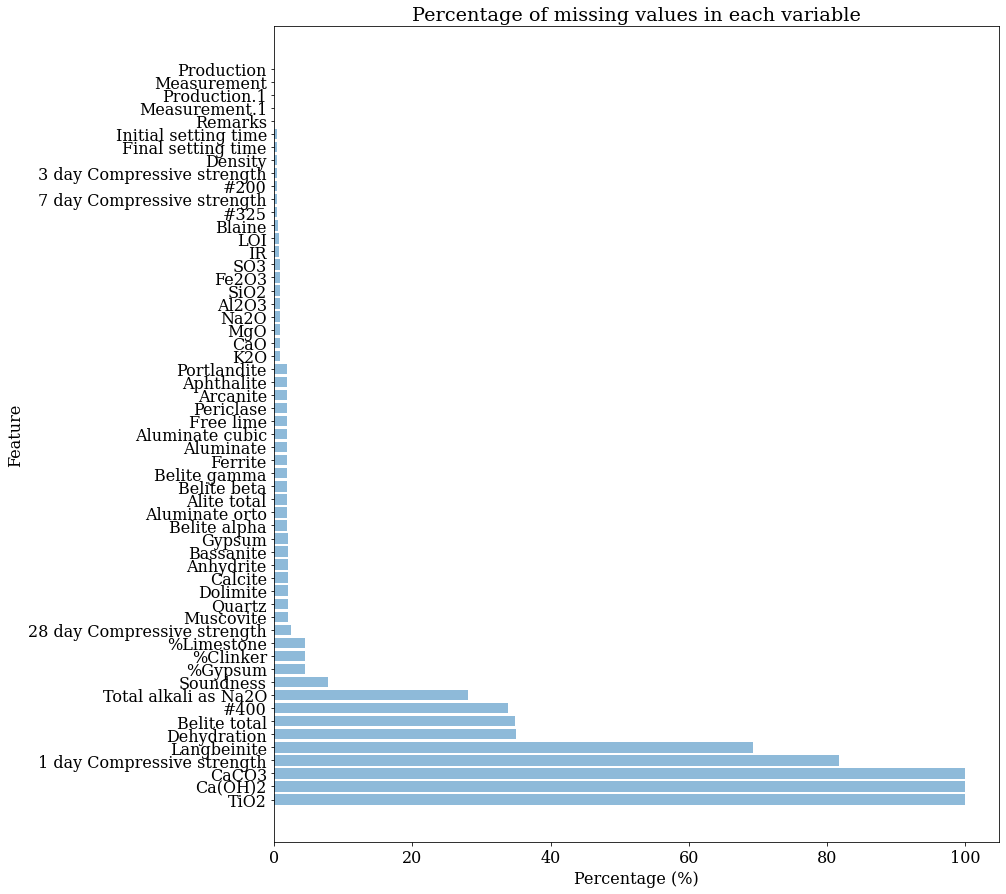

<IPython.core.display.Javascript object>

In [37]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [38]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [39]:
df_copy = df.copy().select_dtypes(exclude=object)
df_copy["Remarks"] = df["Remarks"].values.copy()
df_copy["Date"] = dates
df_grouped = df_copy.groupby(["Remarks", "Date"]).mean()

# If we just count the daily mean by cement type, how does the missing be afterwards

(df_grouped.isna().sum() / df_grouped.shape[0] * 100).sort_values(
    ascending=False
).to_frame(name="Missing (%)").style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 57 artists>

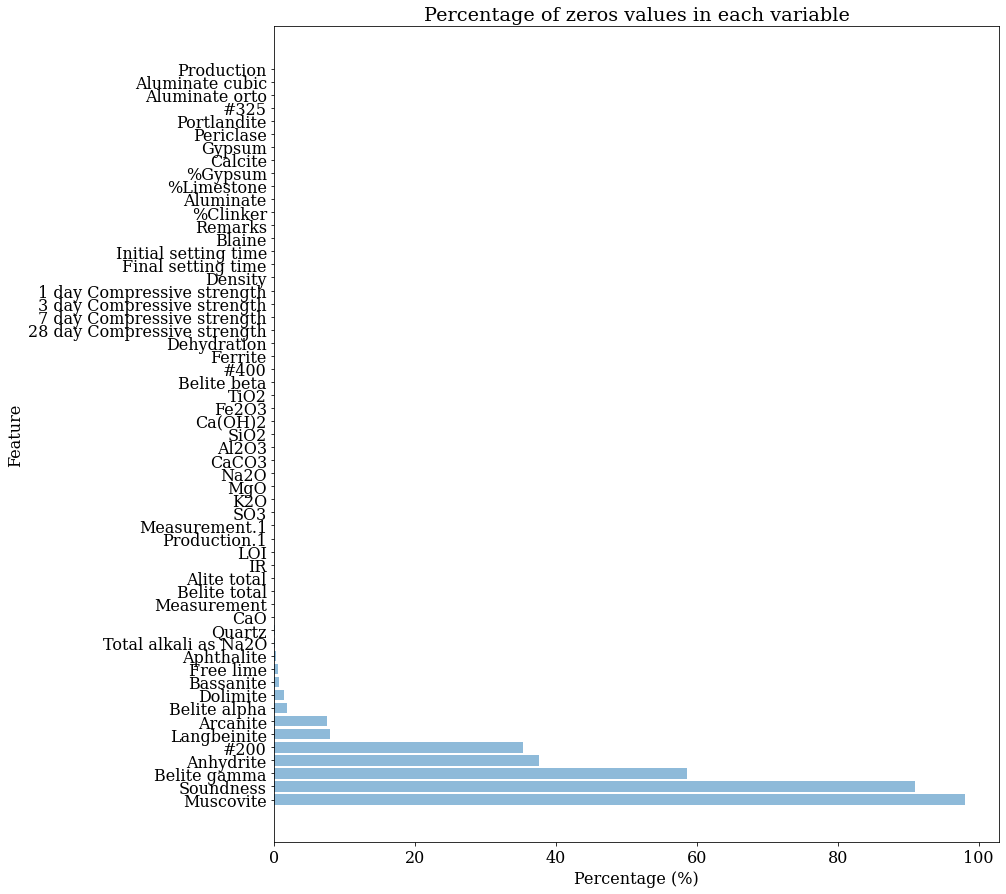

<IPython.core.display.Javascript object>

In [40]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [41]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [42]:
n_duplicates = (
    df.drop(["Production", "Measurement", "Production.1", "Measurement.1"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

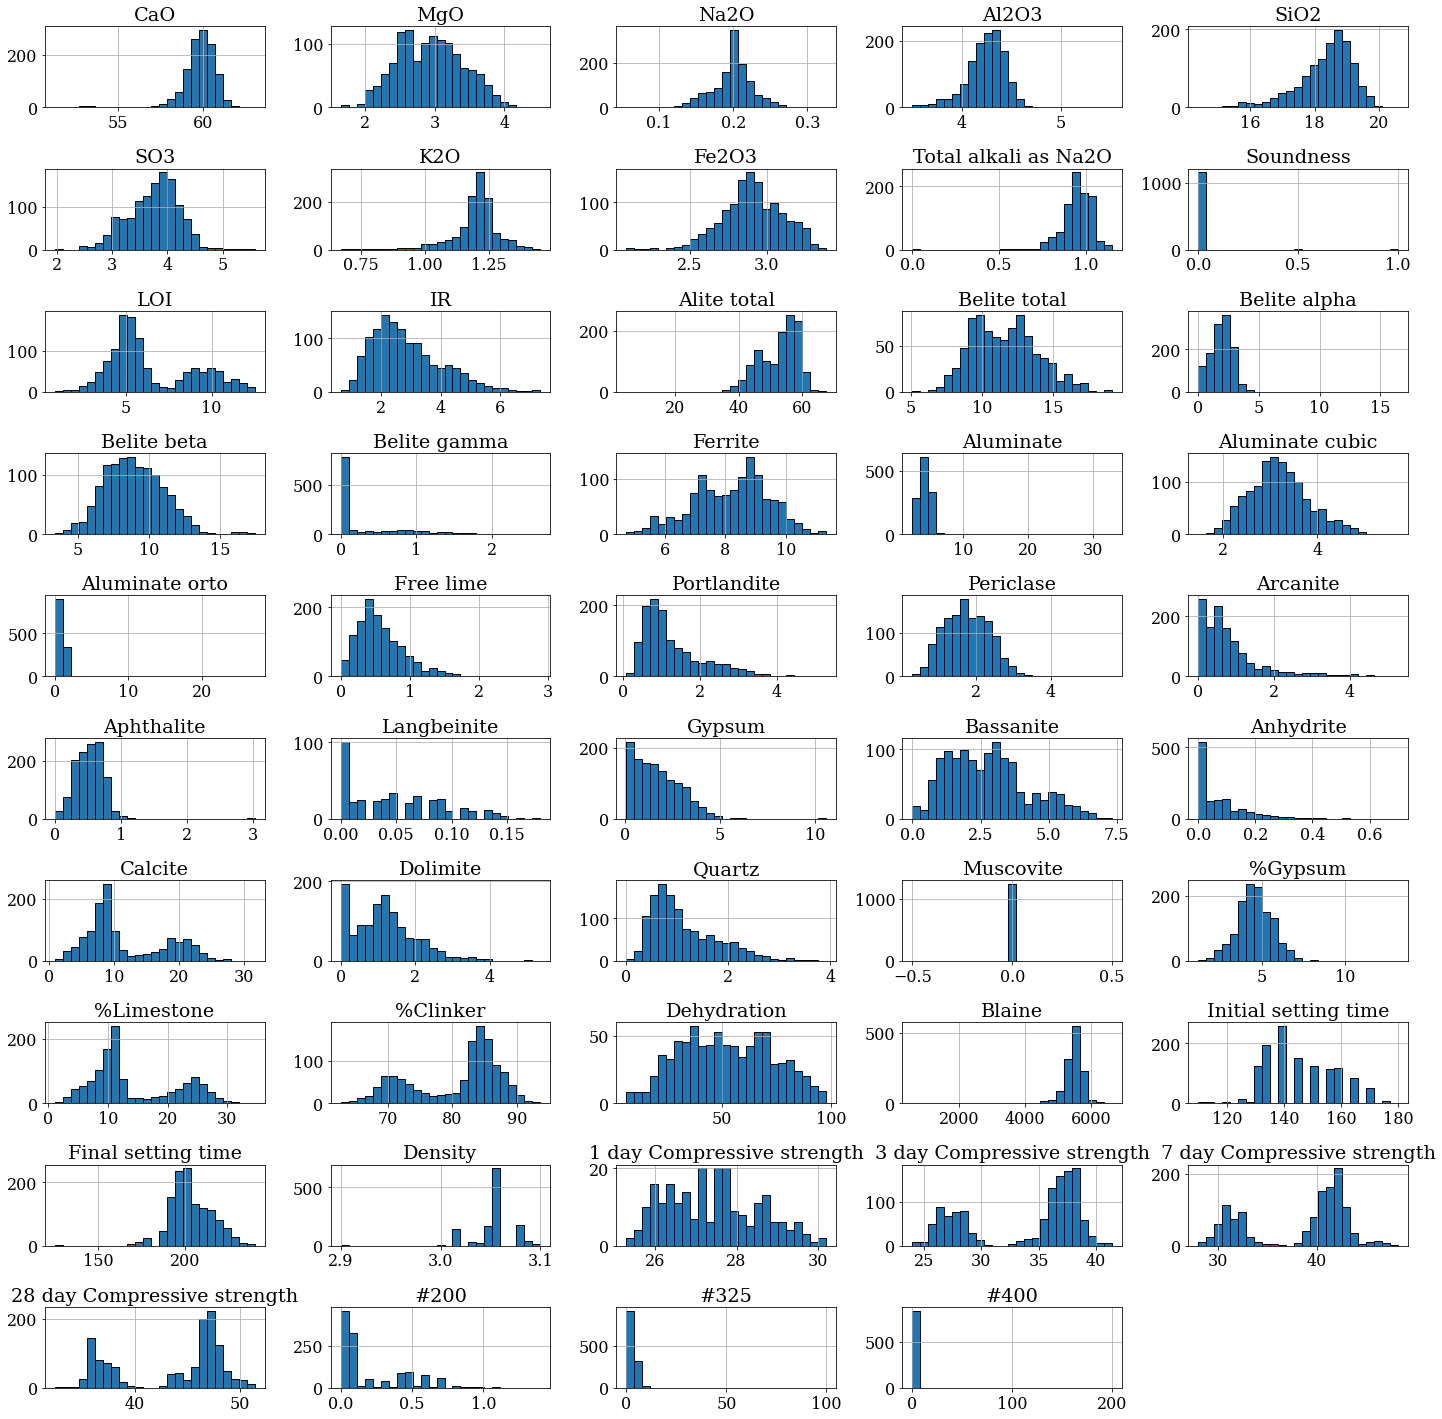

<IPython.core.display.Javascript object>

In [43]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

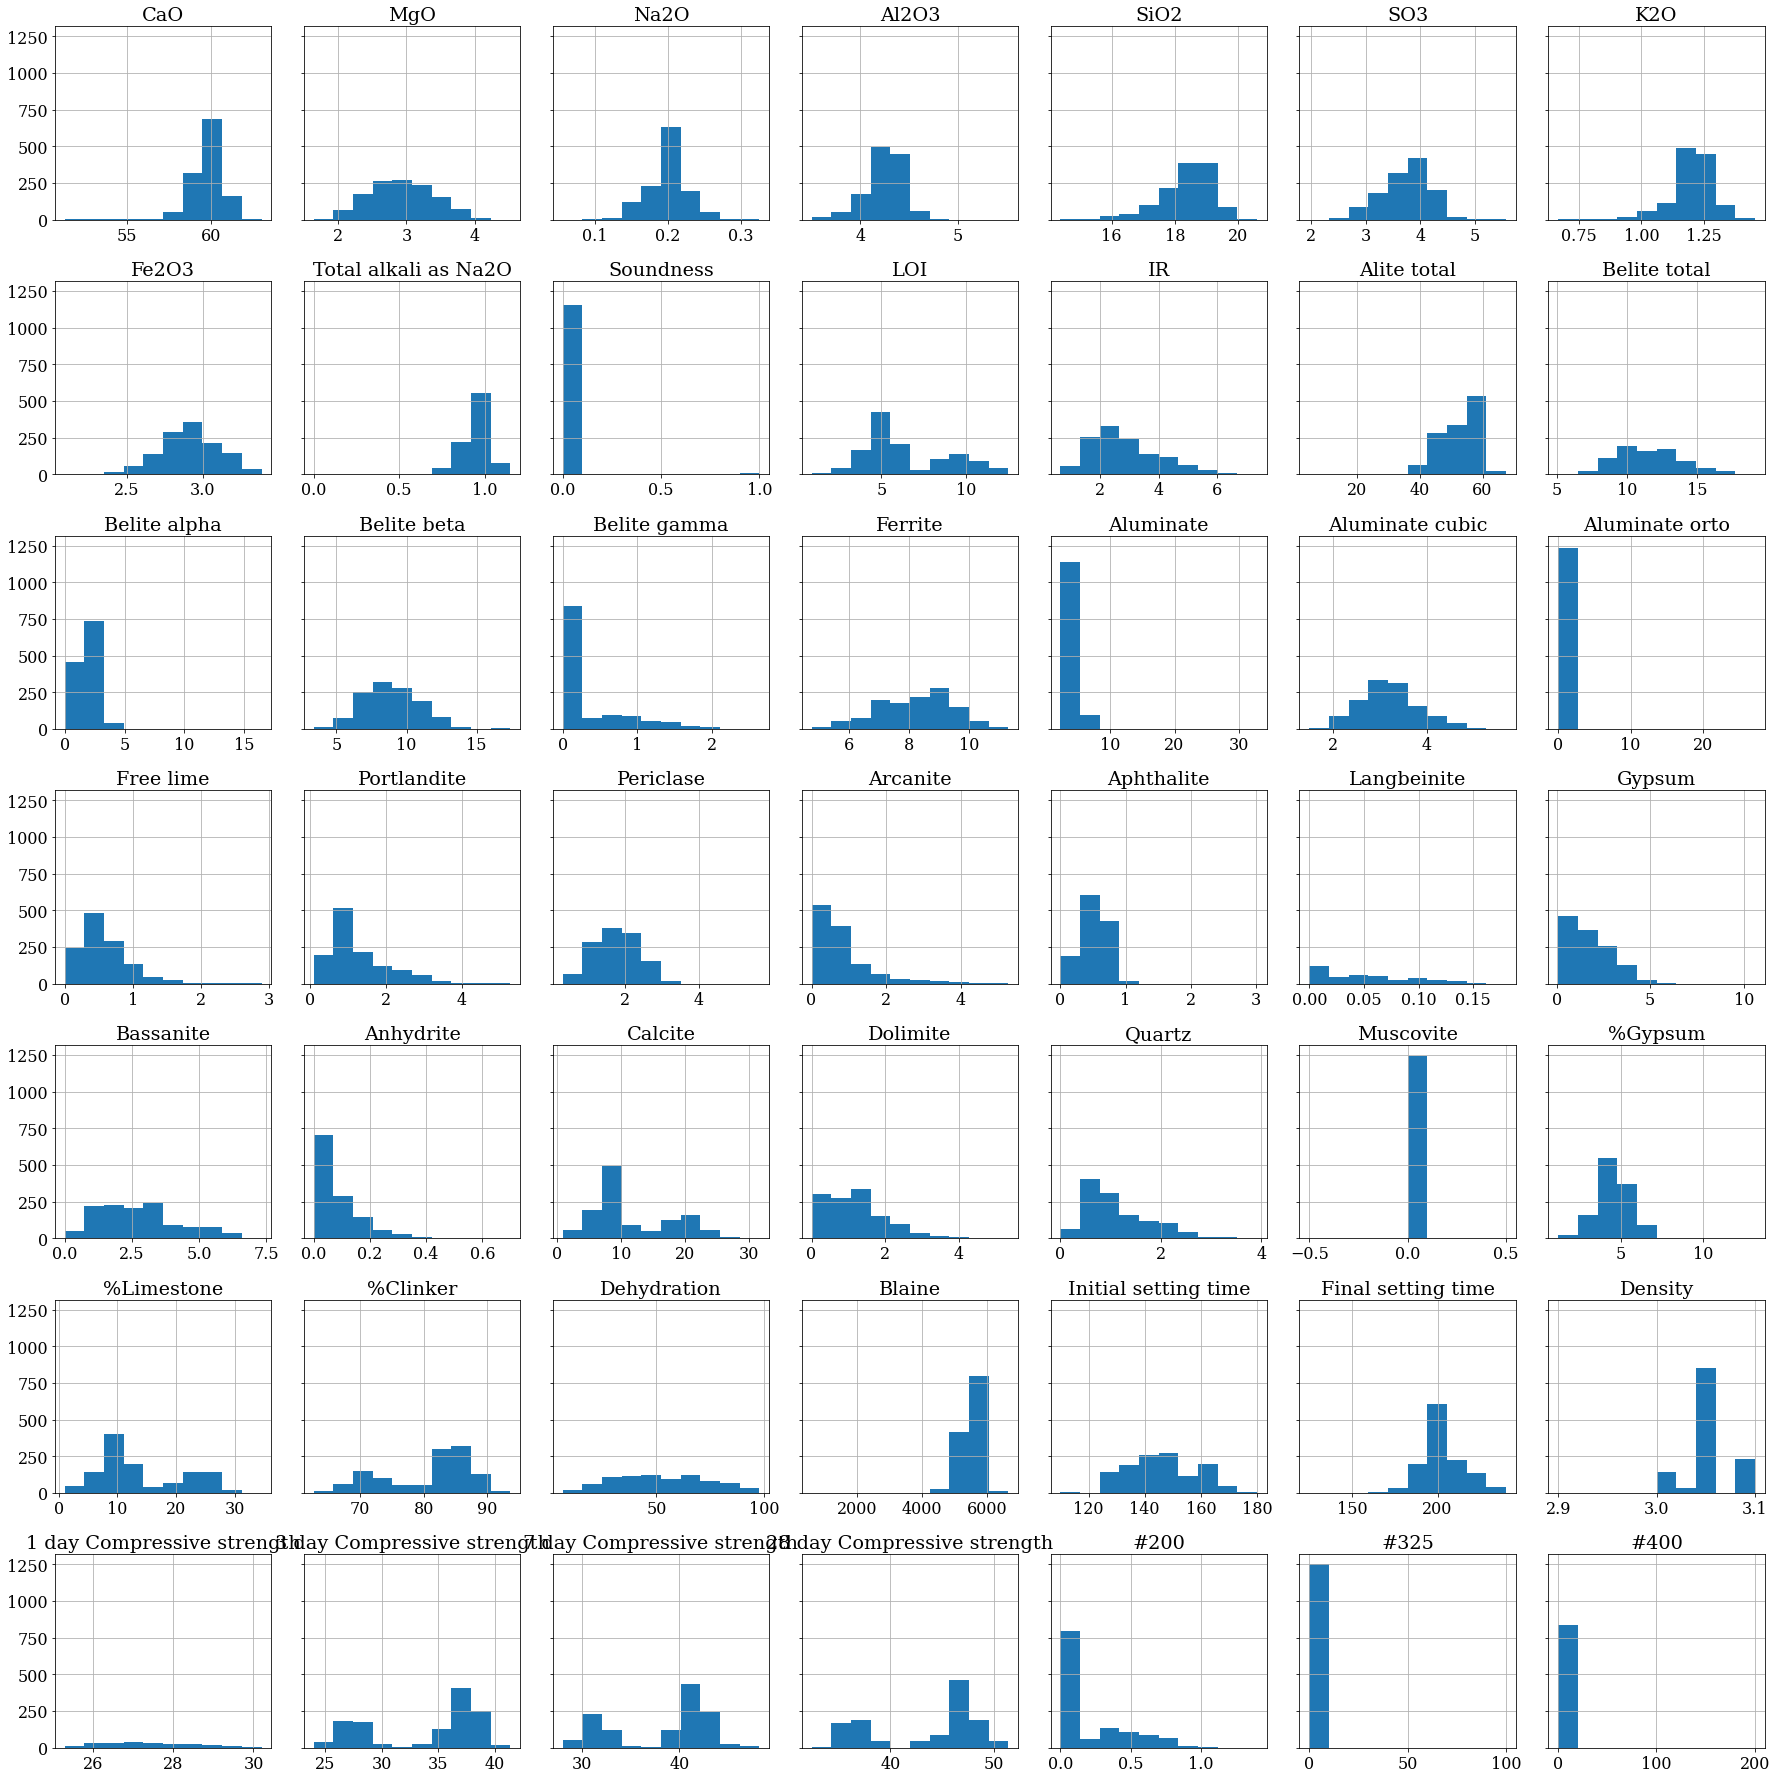

<IPython.core.display.Javascript object>

In [44]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


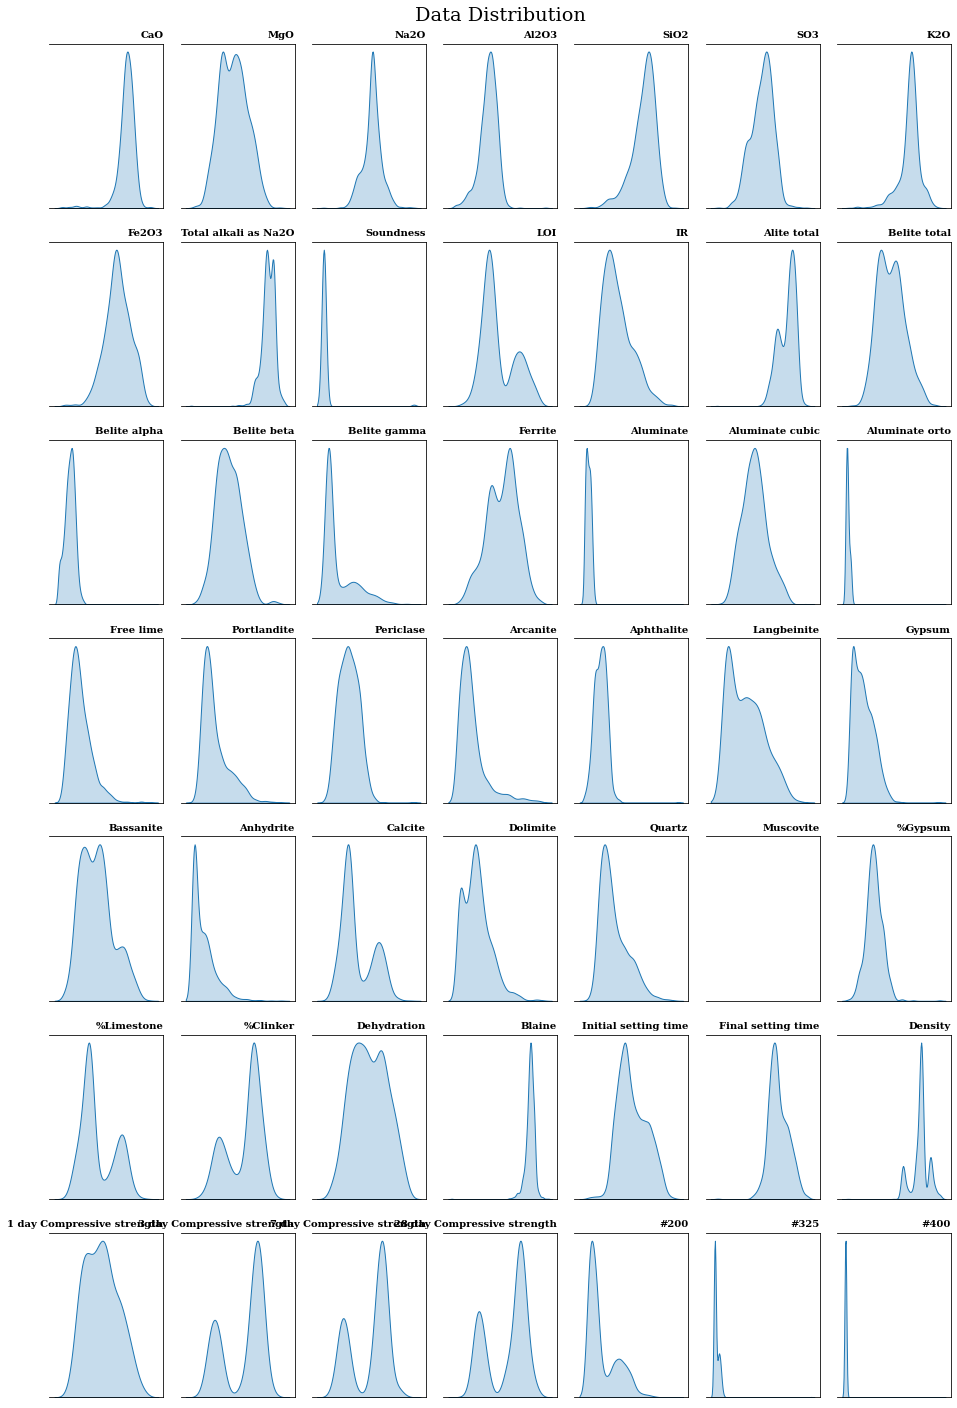

<IPython.core.display.Javascript object>

In [45]:
fig, axes = plt.subplots(7, 7, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

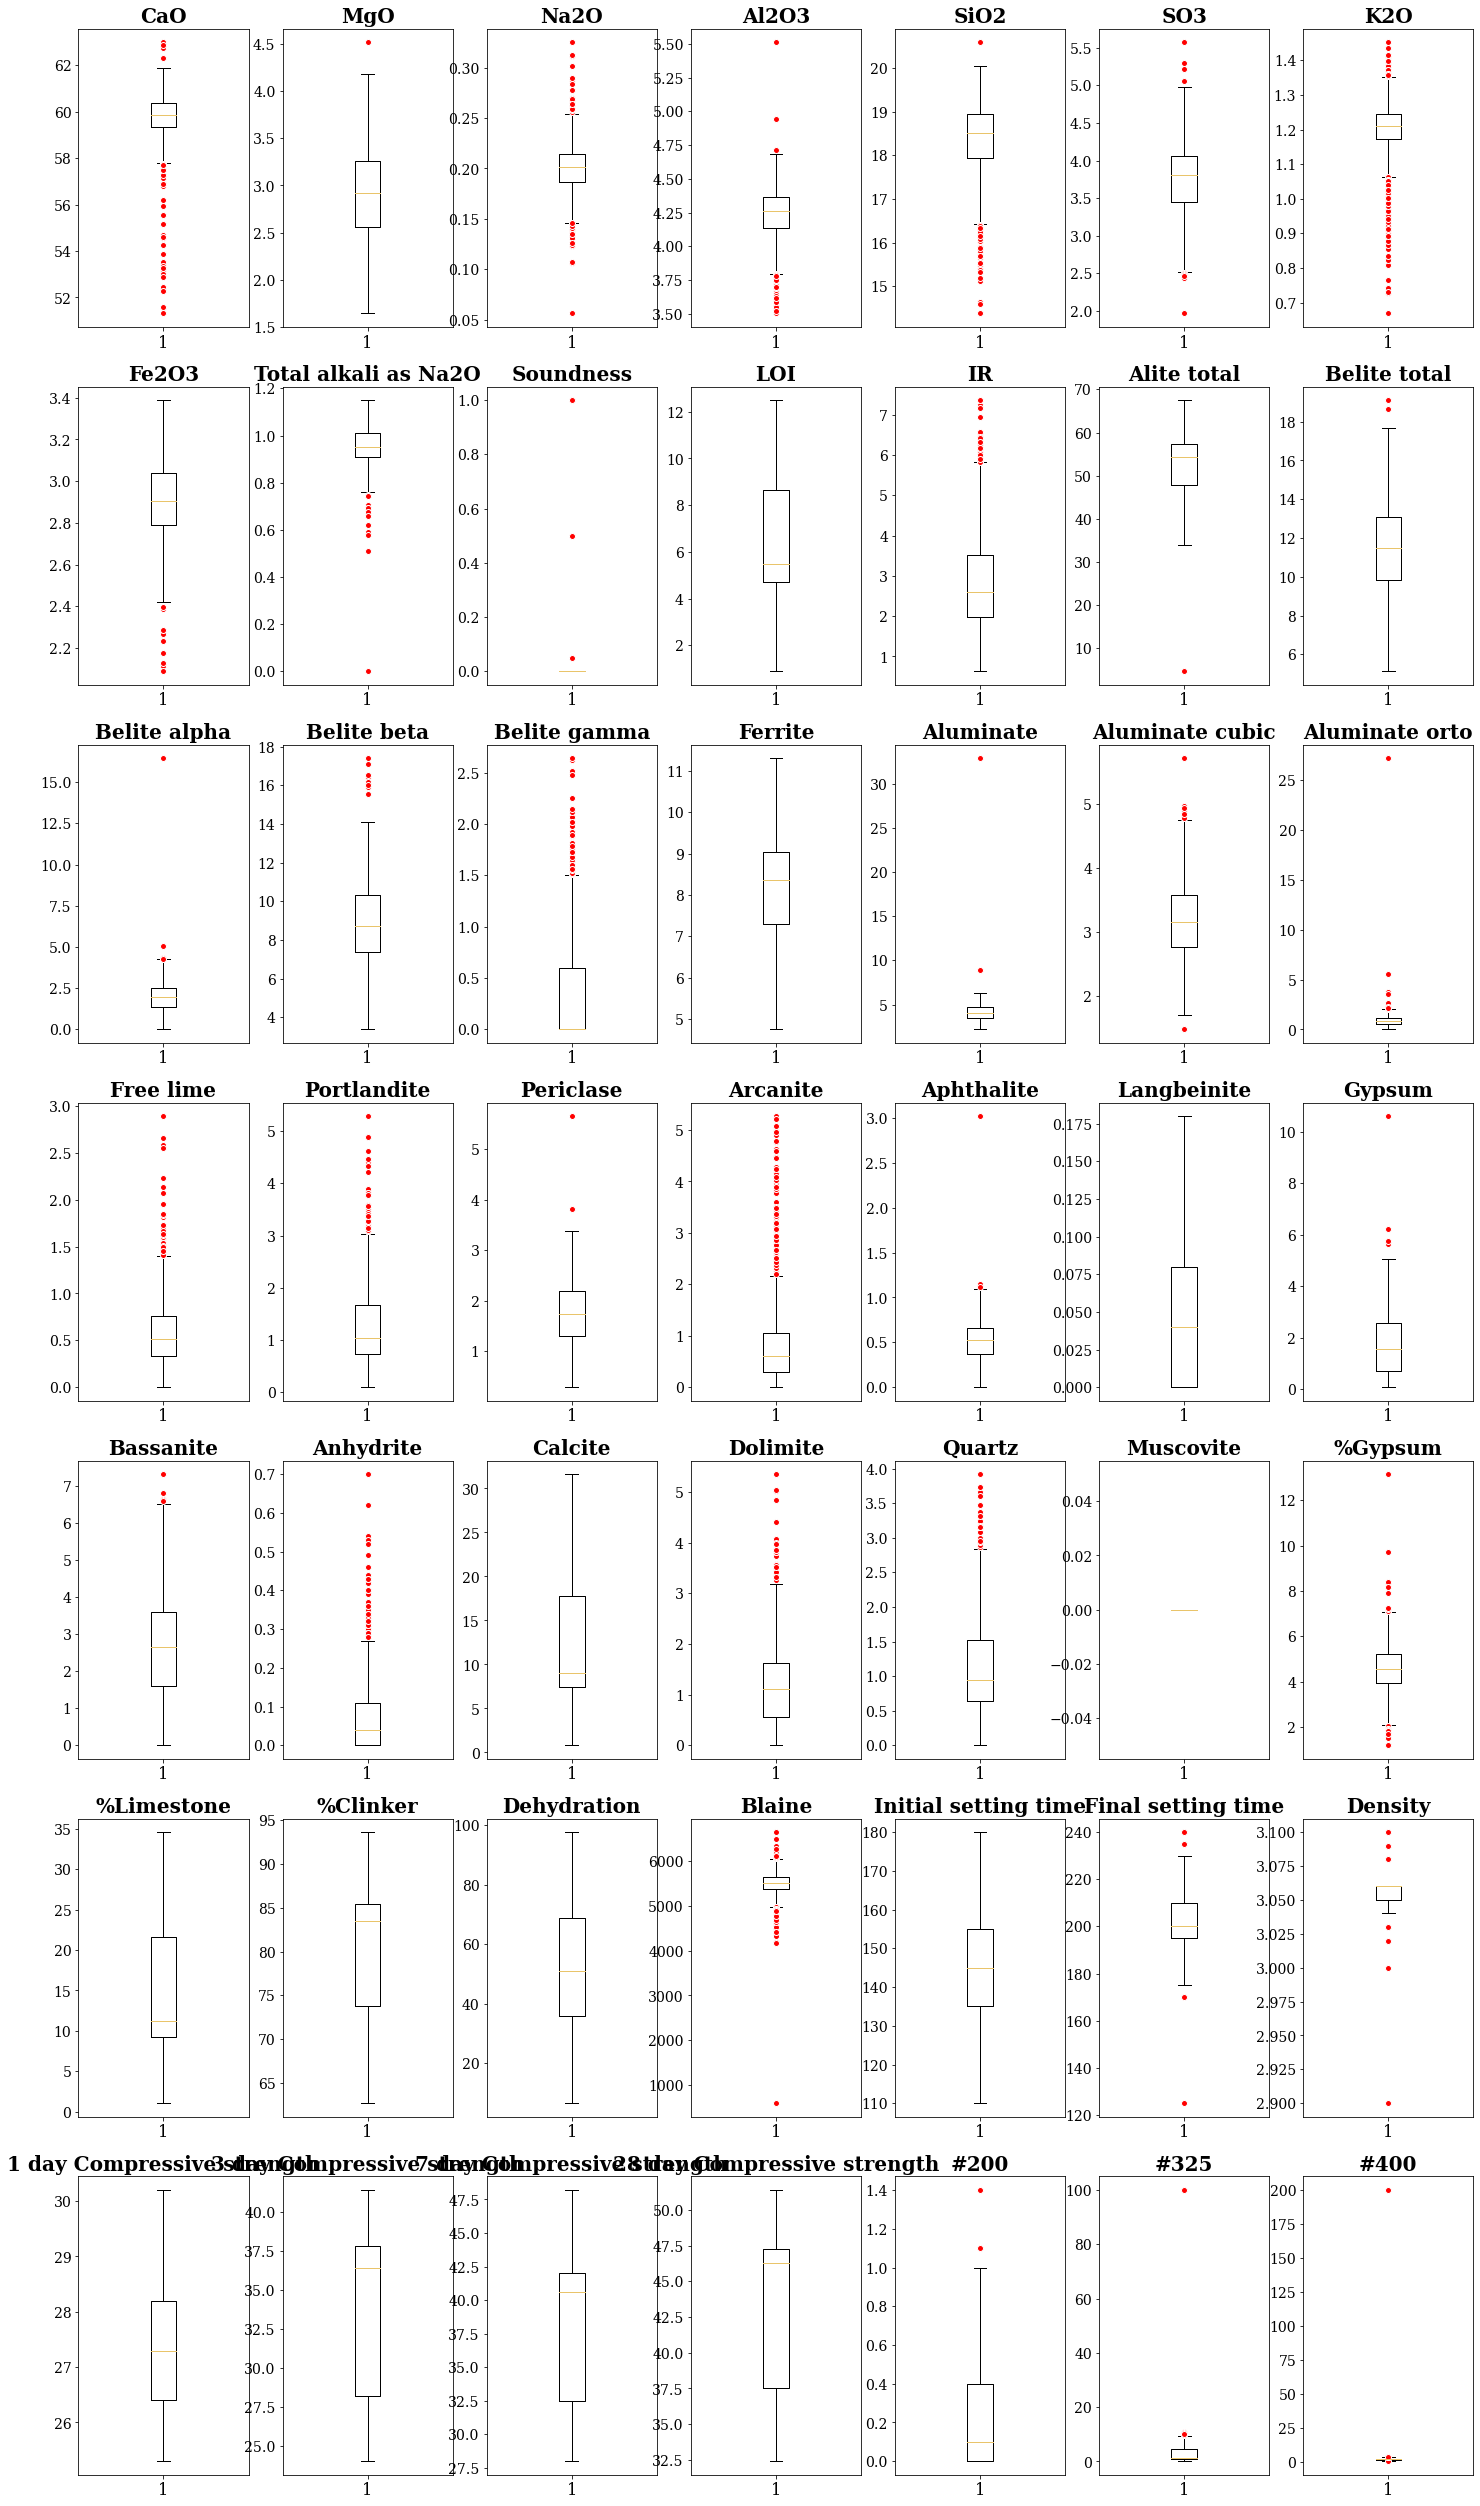

<IPython.core.display.Javascript object>

In [46]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(7, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<AxesSubplot:>

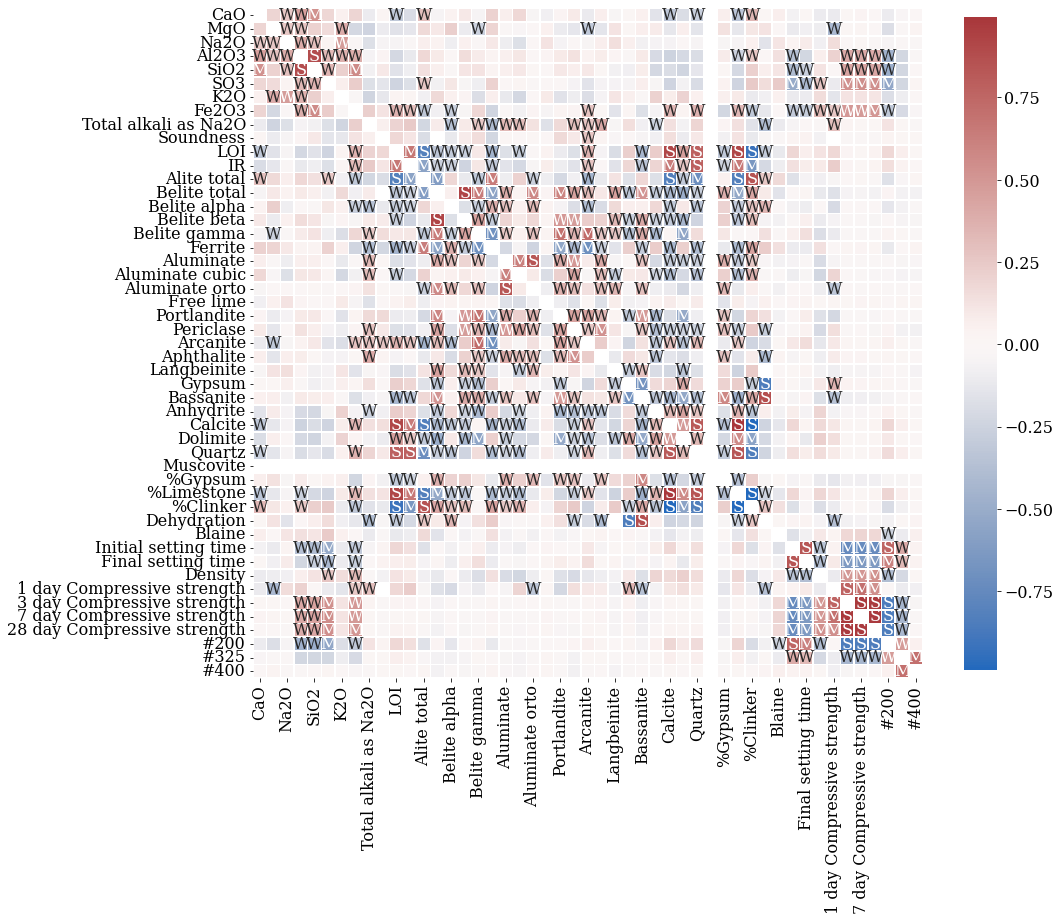

<IPython.core.display.Javascript object>

In [47]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

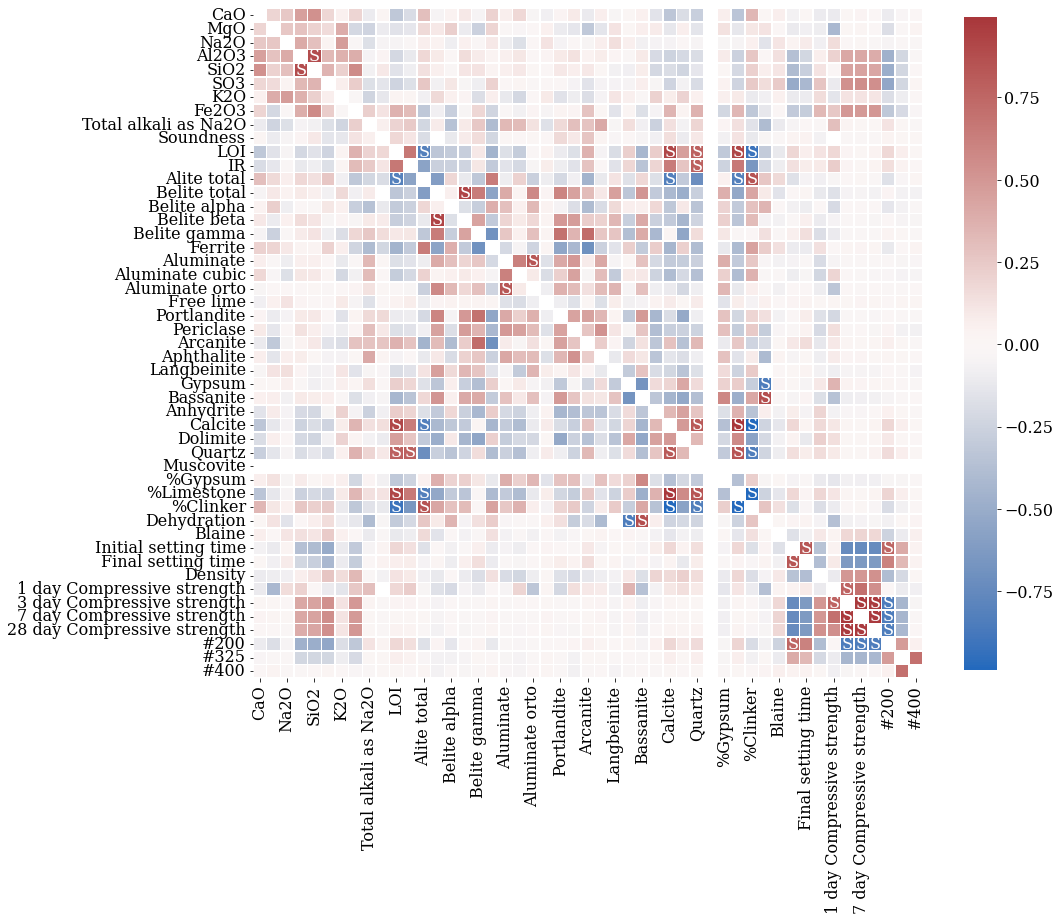

<IPython.core.display.Javascript object>

In [48]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) >= 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

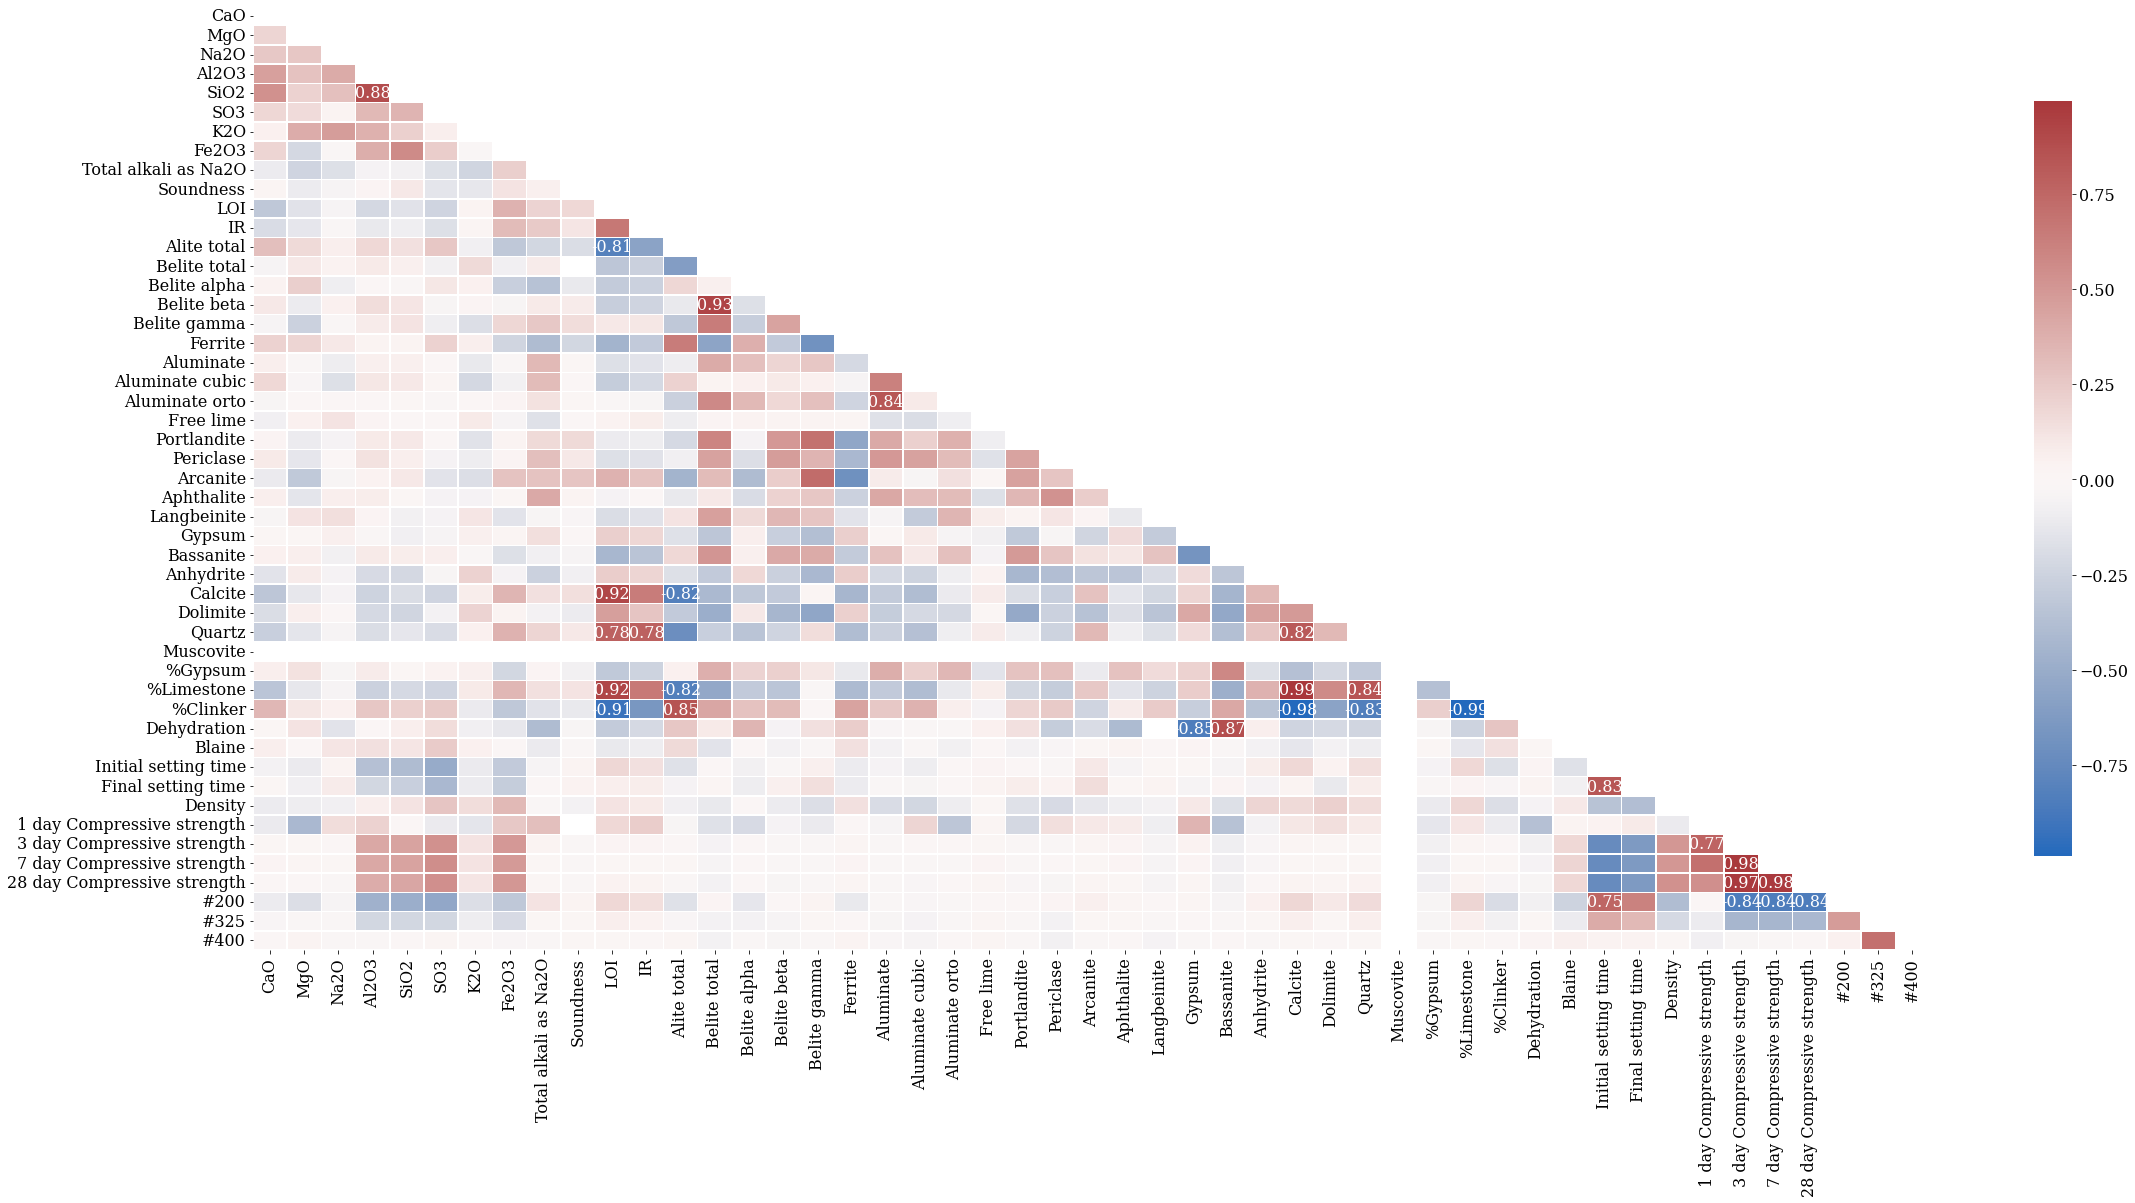

<IPython.core.display.Javascript object>

In [49]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

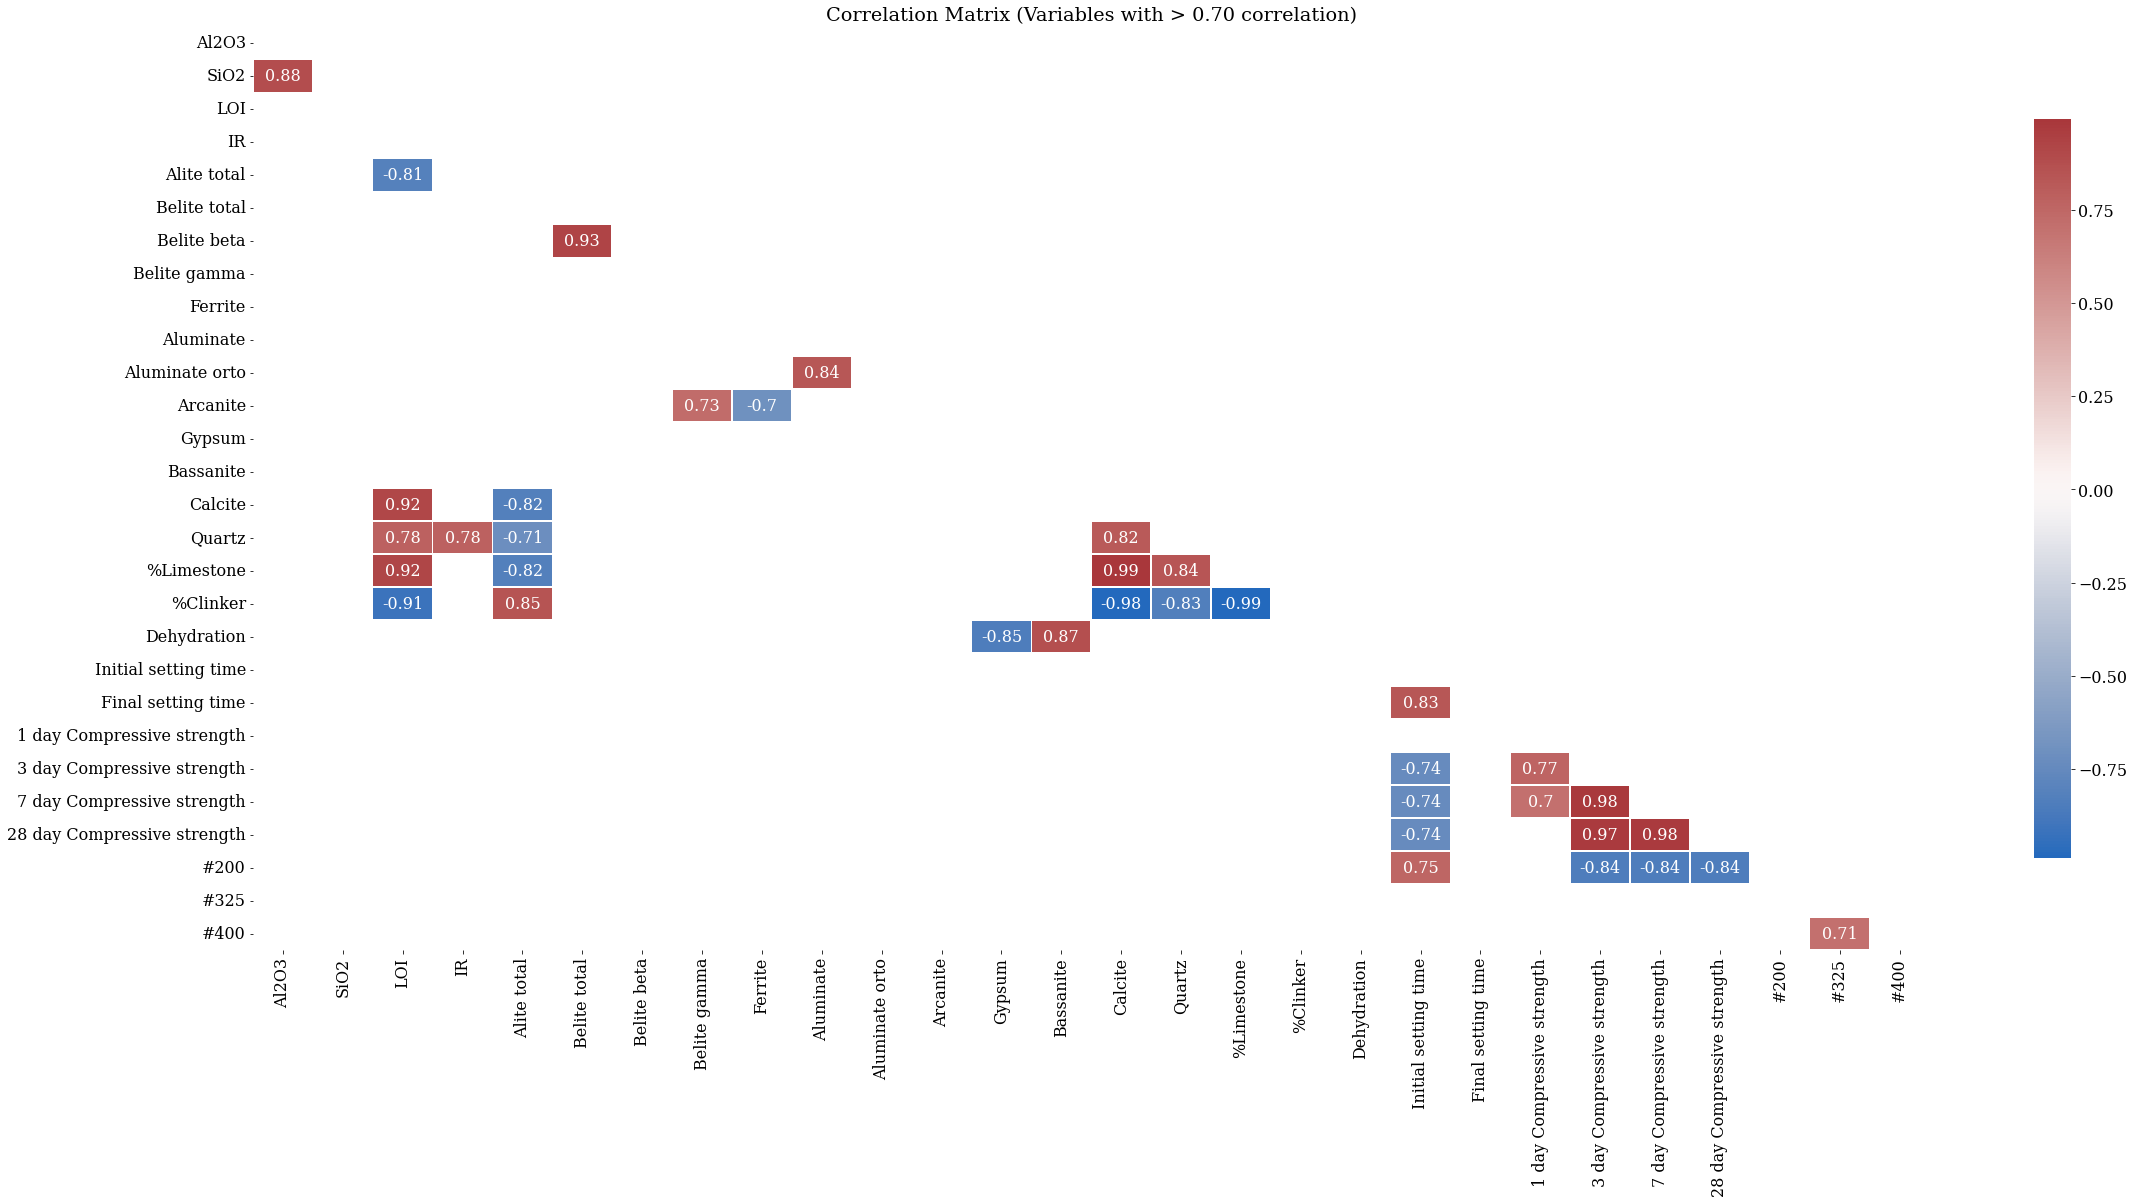

<IPython.core.display.Javascript object>

In [50]:
df_corr = df.corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [51]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                      %Limestone                     0.993886
%Limestone                   %Clinker                       0.988033
3 day Compressive strength   7 day Compressive strength     0.984819
Calcite                      %Clinker                       0.981509
7 day Compressive strength   28 day Compressive strength    0.975498
3 day Compressive strength   28 day Compressive strength    0.973318
Belite total                 Belite beta                    0.930308
LOI                          %Limestone                     0.917710
                             Calcite                        0.916256
                             %Clinker                       0.911097
Al2O3                        SiO2                           0.879734
Bassanite                    Dehydration                    0.871823
Alite total                  %Clinker                       0.852488
Gypsum                       Dehydration                    0.846588
28 day Compressive strength  #200 

<IPython.core.display.Javascript object>

In [52]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.975498
3 day Compressive strength   28 day Compressive strength    0.973318
28 day Compressive strength  #200                           0.844964
Initial setting time         28 day Compressive strength    0.735332
Final setting time           28 day Compressive strength    0.626692
1 day Compressive strength   28 day Compressive strength    0.541538
SO3                          28 day Compressive strength    0.538783
Density                      28 day Compressive strength    0.535859
Fe2O3                        28 day Compressive strength    0.502522
SiO2                         28 day Compressive strength    0.422789
28 day Compressive strength  #325                           0.419284
Al2O3                        28 day Compressive strength    0.395373
Blaine                       28 day Compressive strength    0.176009
K2O                          28 day Compressive strength    0.115806
%Gypsum                      28 da

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

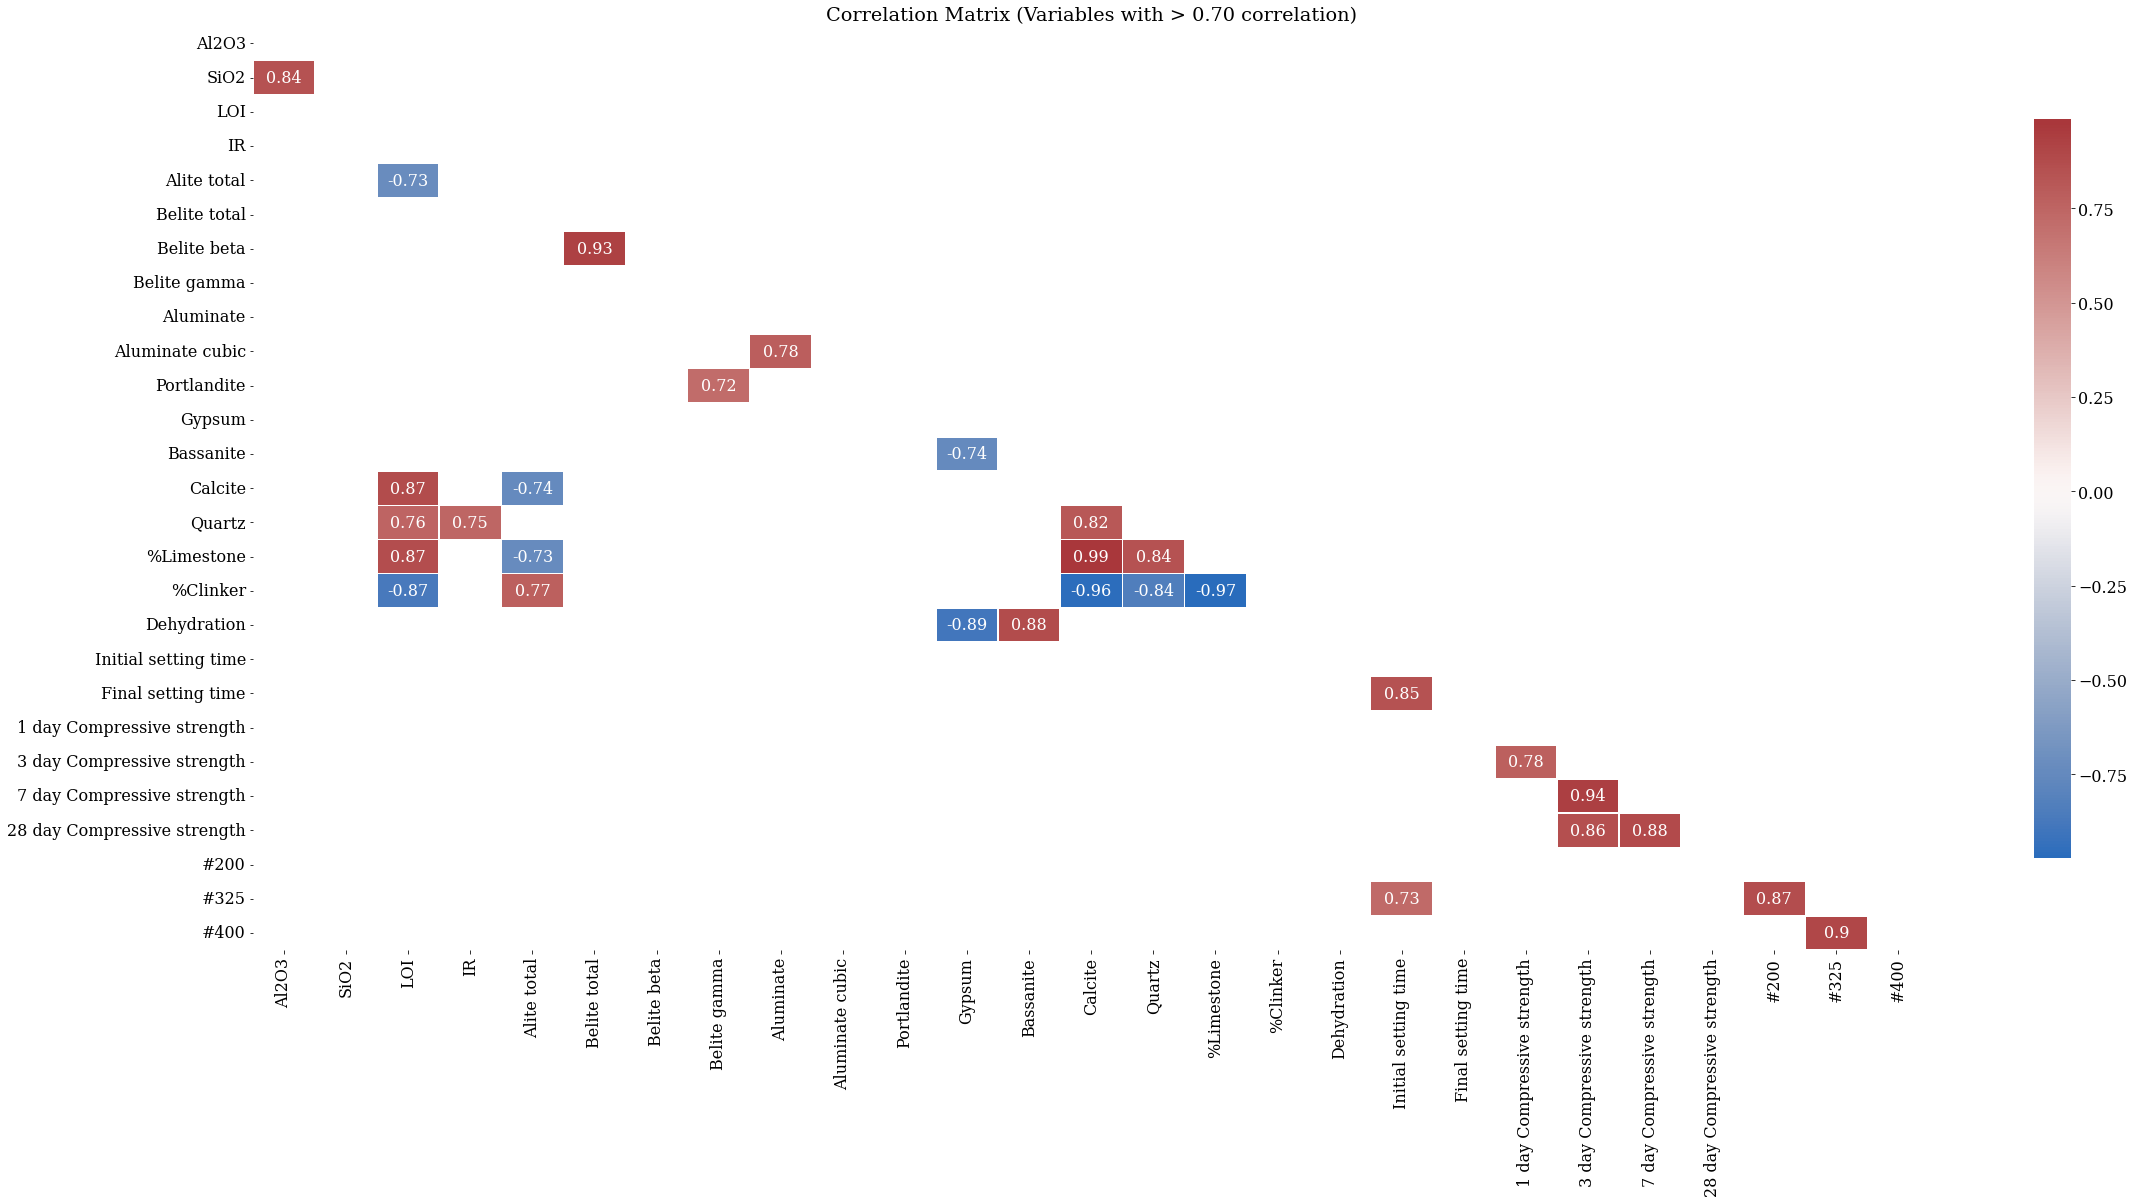

<IPython.core.display.Javascript object>

In [53]:
df_corr = df.corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [54]:
corr_matrix = df.corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                     %Limestone                     0.987218
%Limestone                  %Clinker                       0.970777
Calcite                     %Clinker                       0.958675
3 day Compressive strength  7 day Compressive strength     0.935436
Belite total                Belite beta                    0.932923
#325                        #400                           0.902679
Gypsum                      Dehydration                    0.887164
7 day Compressive strength  28 day Compressive strength    0.882720
Bassanite                   Dehydration                    0.875749
LOI                         Calcite                        0.874785
                            %Limestone                     0.871610
                            %Clinker                       0.869652
#200                        #325                           0.867966
3 day Compressive strength  28 day Compressive strength    0.863127
Initial setting time        Final setting time  

<IPython.core.display.Javascript object>

In [55]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.882720
3 day Compressive strength   28 day Compressive strength    0.863127
28 day Compressive strength  #200                           0.645697
                             #325                           0.628538
Initial setting time         28 day Compressive strength    0.594110
1 day Compressive strength   28 day Compressive strength    0.534694
Final setting time           28 day Compressive strength    0.530483
Fe2O3                        28 day Compressive strength    0.529569
Density                      28 day Compressive strength    0.516880
SO3                          28 day Compressive strength    0.452438
SiO2                         28 day Compressive strength    0.376897
Al2O3                        28 day Compressive strength    0.335834
%Gypsum                      28 day Compressive strength    0.147745
LOI                          28 day Compressive strength    0.138562
Calcite                      28 da

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

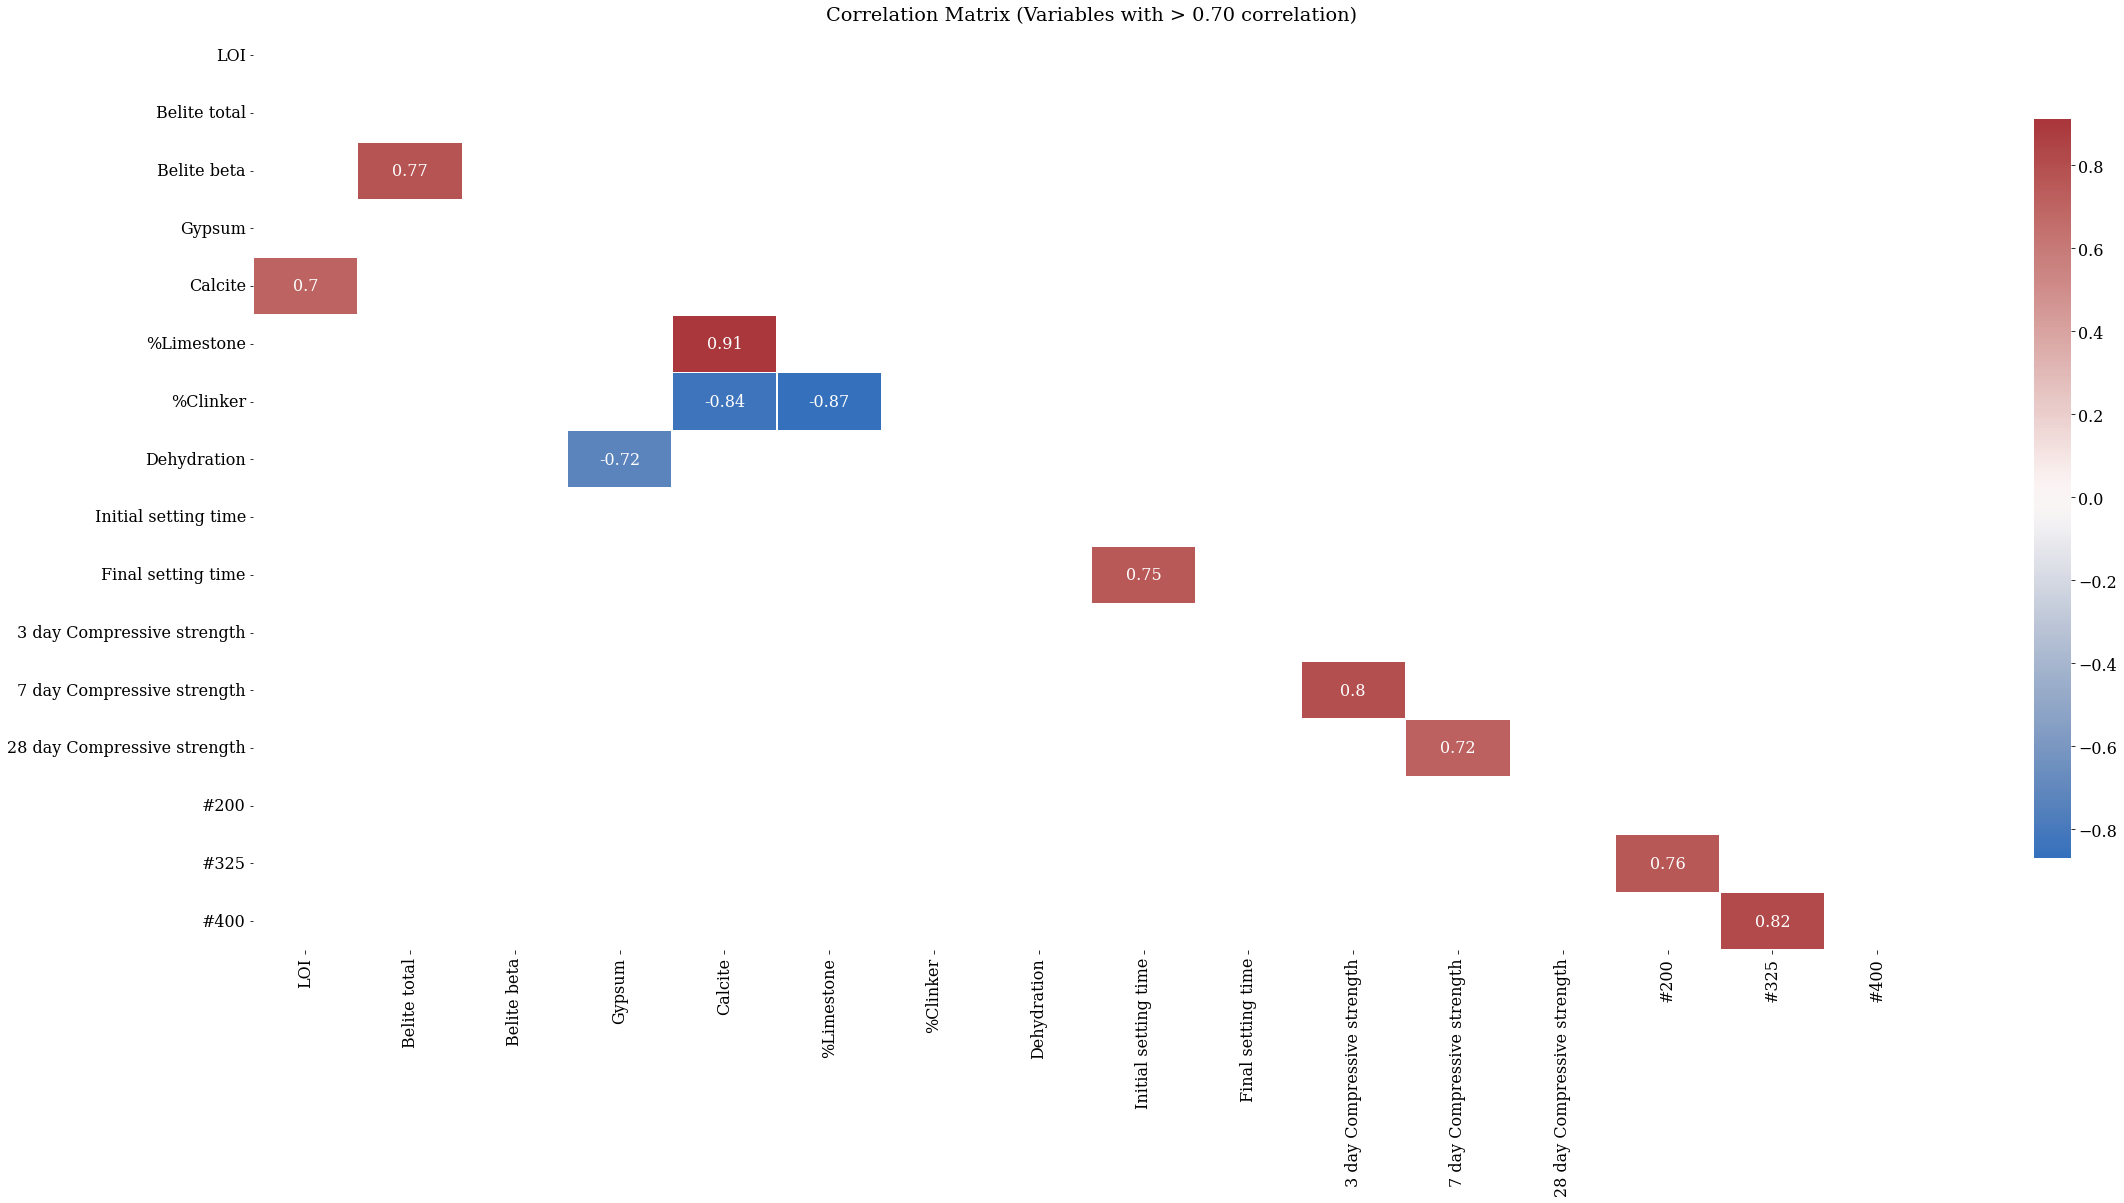

<IPython.core.display.Javascript object>

In [56]:
df_corr = df.corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [57]:
corr_matrix = df.corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Calcite                     %Limestone                     0.912215
%Limestone                  %Clinker                       0.868708
Calcite                     %Clinker                       0.835332
#325                        #400                           0.815835
3 day Compressive strength  7 day Compressive strength     0.799802
Belite total                Belite beta                    0.773792
#200                        #325                           0.763138
Initial setting time        Final setting time             0.753363
Gypsum                      Dehydration                    0.722968
7 day Compressive strength  28 day Compressive strength    0.715797
LOI                         Calcite                        0.704784
dtype: float64

<IPython.core.display.Javascript object>

In [58]:
sol[sol.index.map(lambda x: "28 day Compressive strength" in x)]

7 day Compressive strength   28 day Compressive strength    0.715797
3 day Compressive strength   28 day Compressive strength    0.690249
28 day Compressive strength  #200                           0.453902
Initial setting time         28 day Compressive strength    0.421580
28 day Compressive strength  #325                           0.416911
Density                      28 day Compressive strength    0.399654
Final setting time           28 day Compressive strength    0.377459
Fe2O3                        28 day Compressive strength    0.377058
1 day Compressive strength   28 day Compressive strength    0.374080
SO3                          28 day Compressive strength    0.305497
SiO2                         28 day Compressive strength    0.256003
Al2O3                        28 day Compressive strength    0.225035
%Gypsum                      28 day Compressive strength    0.097874
LOI                          28 day Compressive strength    0.093982
Quartz                       28 da

<IPython.core.display.Javascript object>

#### Bivariate Analysis

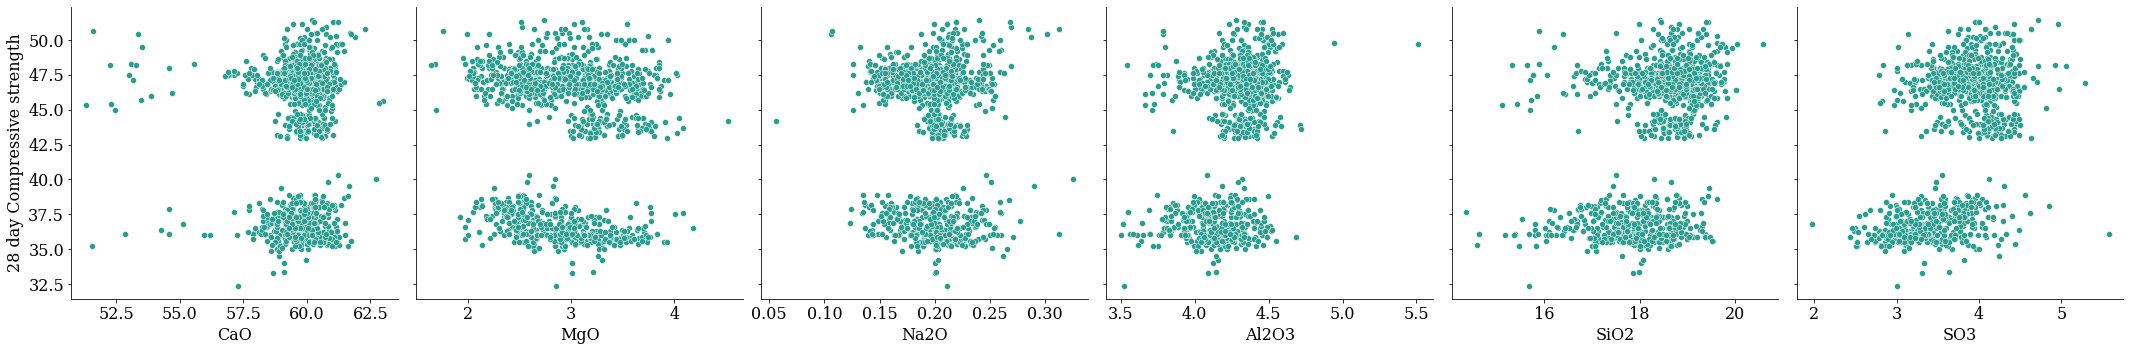

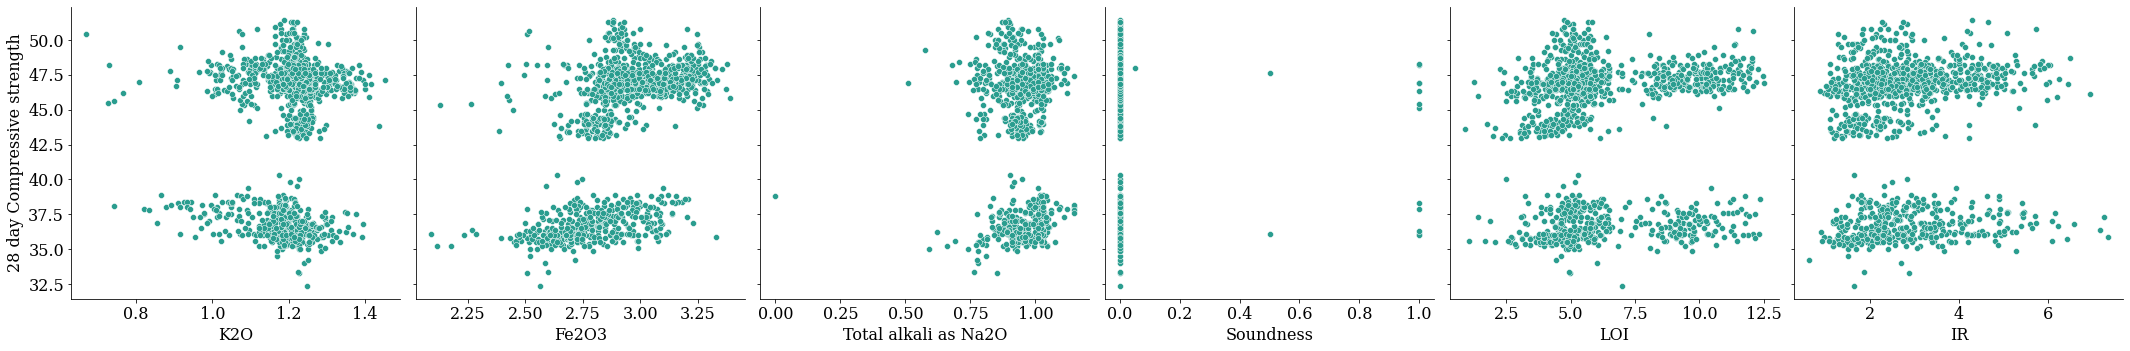

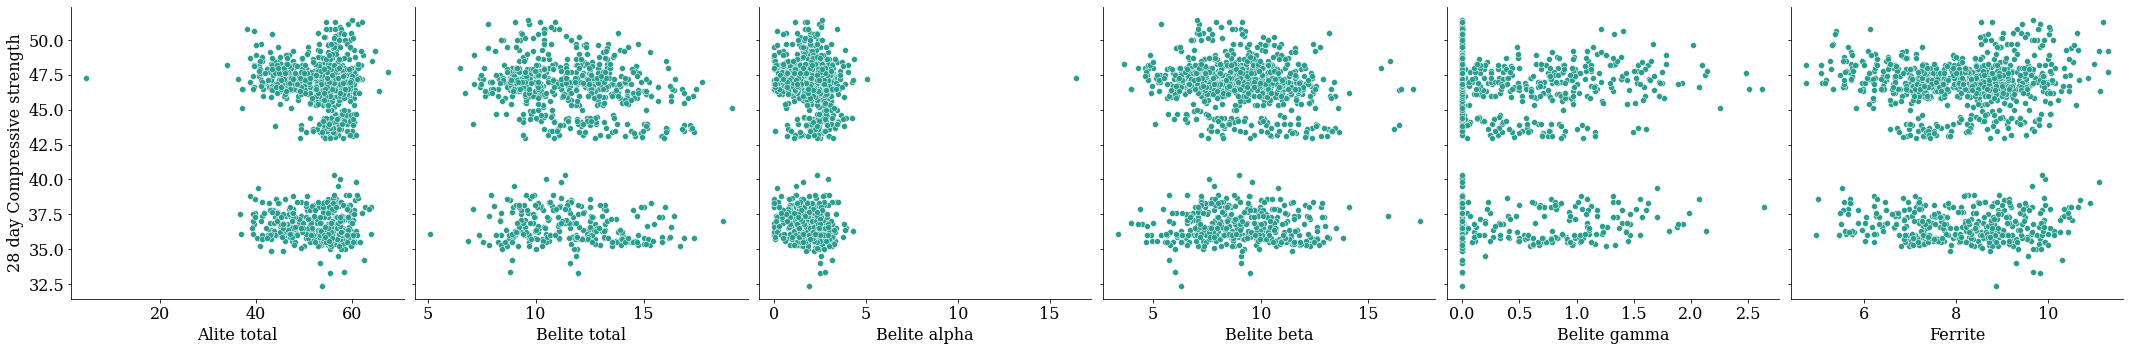

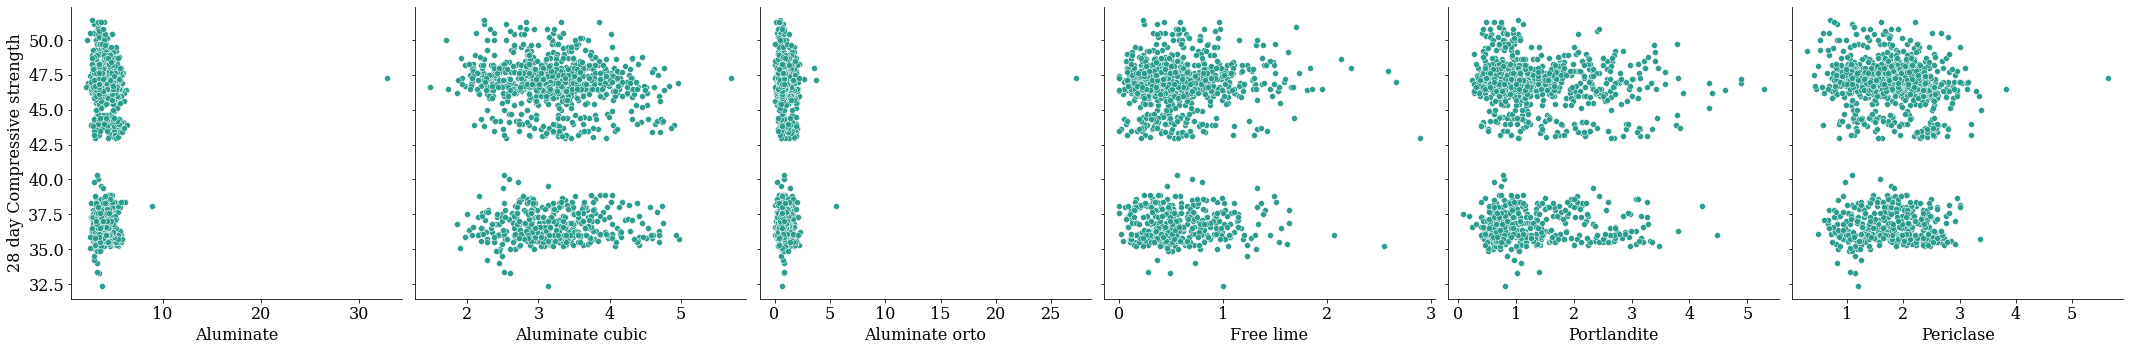

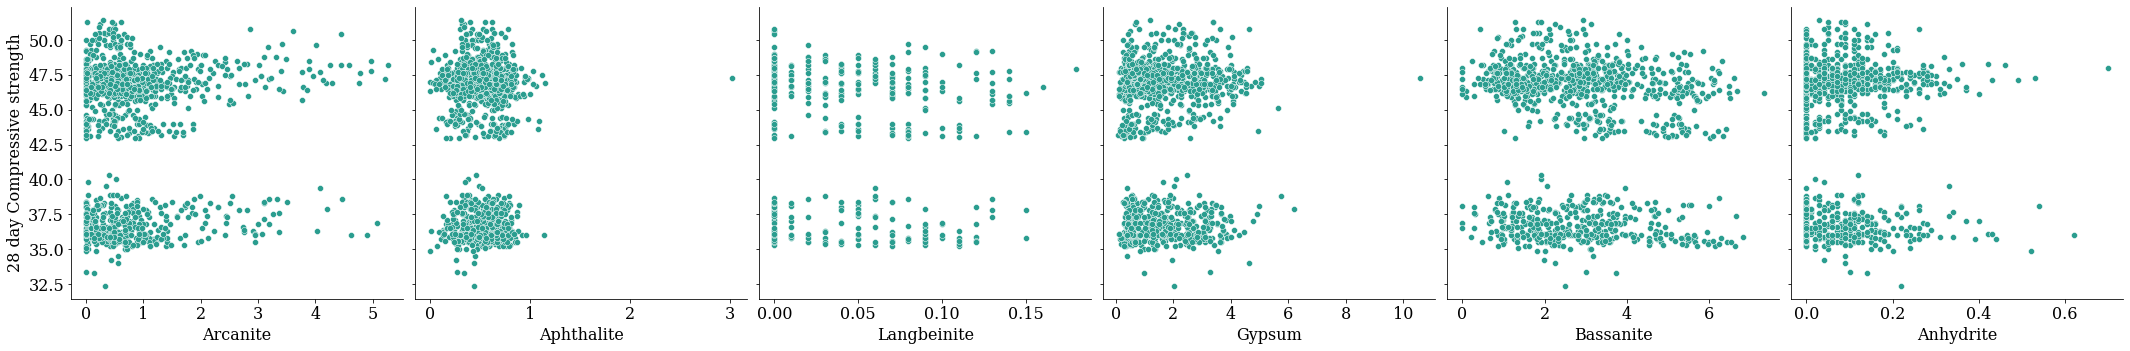

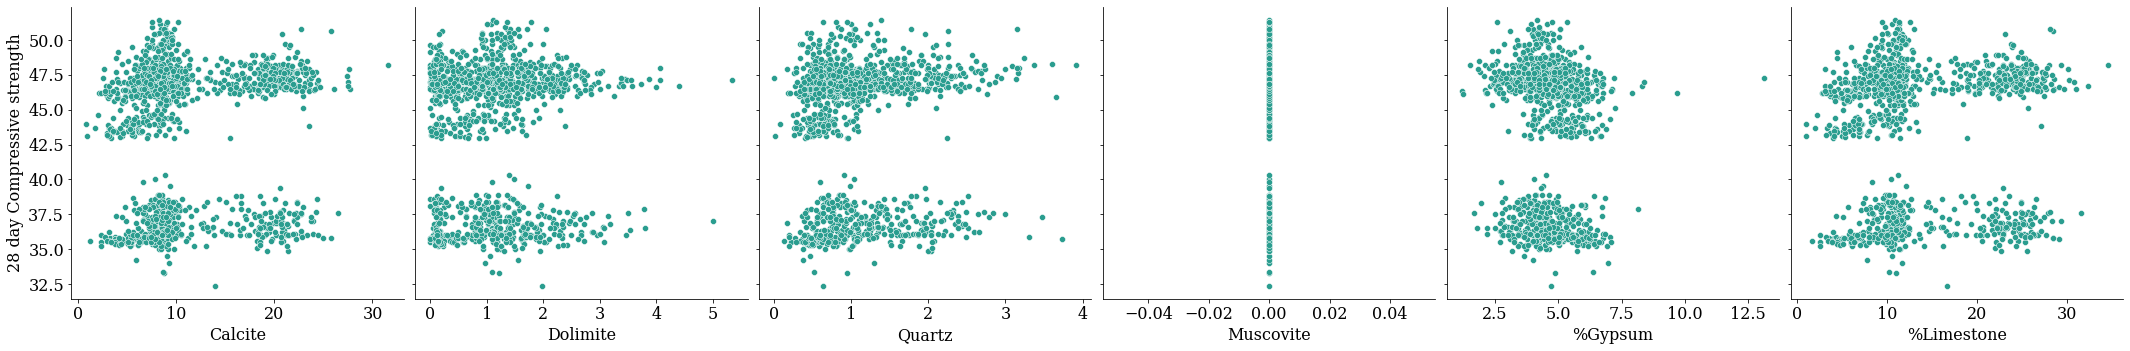

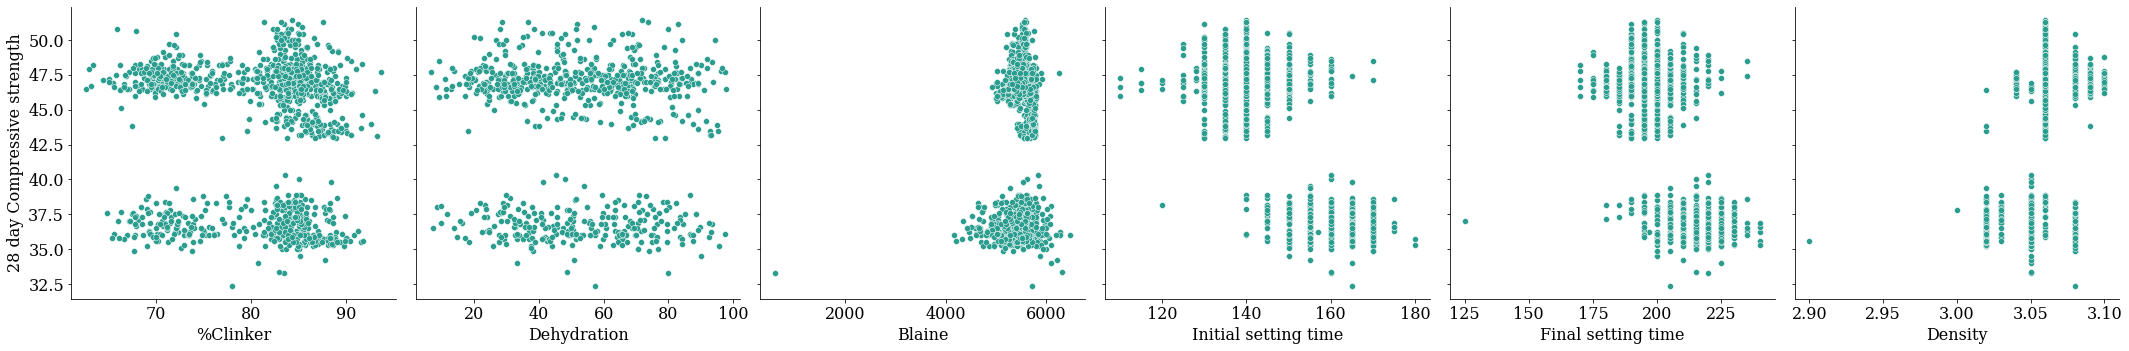

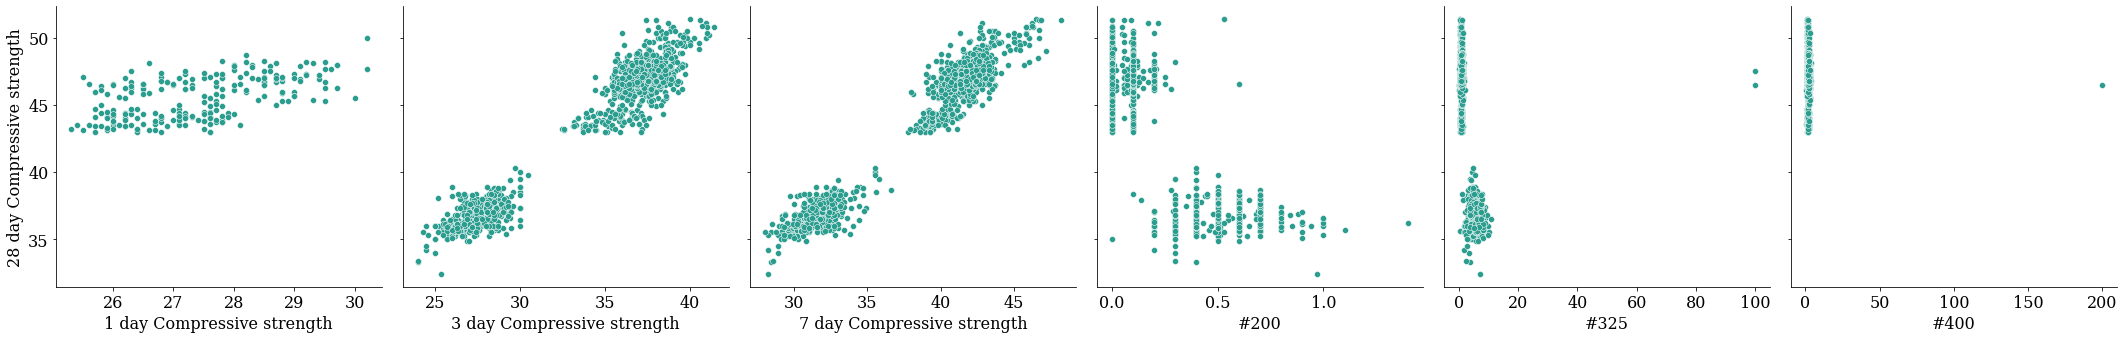

<IPython.core.display.Javascript object>

In [59]:
num_lines = 8
plots_per_line = 6

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("28 day Compressive strength")

num_lines = 8
plots_per_line = 6

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["28 day Compressive strength"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [60]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

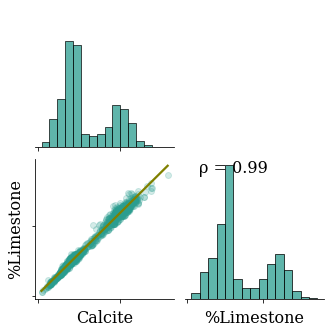

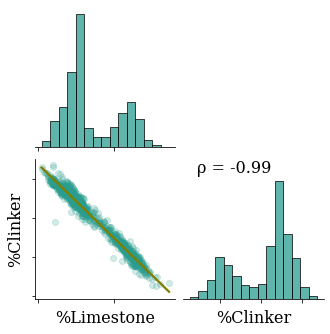

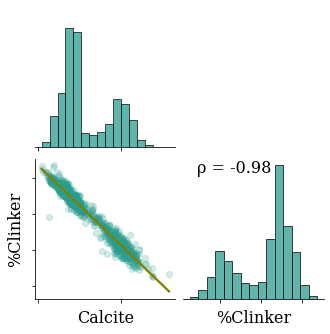

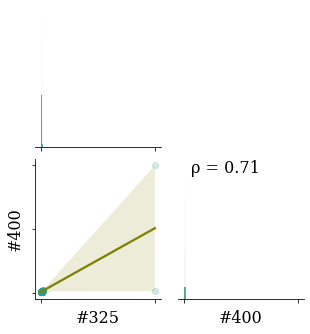

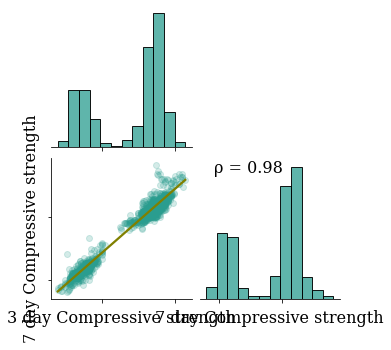

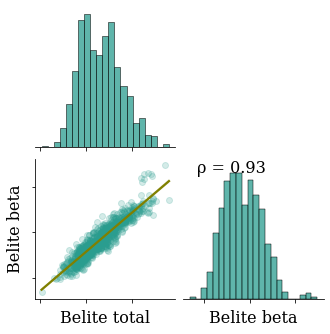

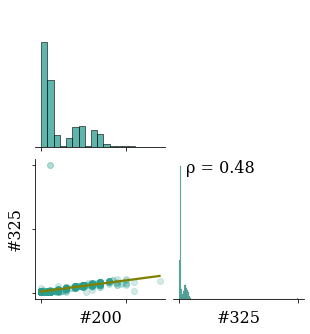

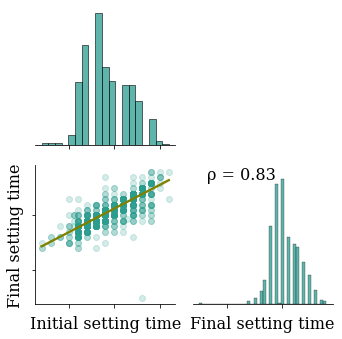

<IPython.core.display.Javascript object>

In [61]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [62]:
dates = pd.to_datetime(
    df["Production"] + " " + df["Production.1"], format="%d/%m/%Y %H:%M:%S"
)

<IPython.core.display.Javascript object>

In [63]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

565 valid days out of 659


<IPython.core.display.Javascript object>

In [64]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022}


<IPython.core.display.Javascript object>

In [65]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5}}

<IPython.core.display.Javascript object>

In [66]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        23
      2        22
      3        23
      4        23
      5        24
      6        25
      7        27
      8        26
      9        25
      10       25
      11       25
      12       22
2021  1        25
      2        21
      3        22
      4        23
      5        22
      6        25
      7        23
      8        26
      9        23
      10       23
      11       21
      12       24
2022  1        20
      2        21
      3        24
      4        24
      5         2
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

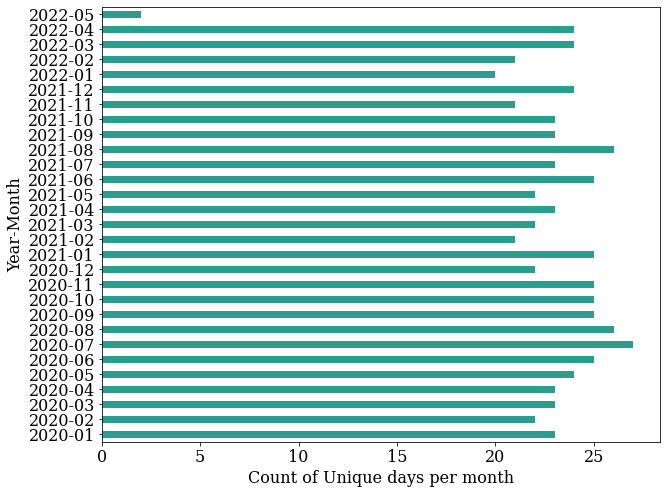

<IPython.core.display.Javascript object>

In [67]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [68]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        66
      2        59
      3        57
      4        44
      5        61
      6        67
      7        64
      8        58
      9        63
      10       64
      11       57
      12       36
2021  1        33
      2        31
      3        34
      4        32
      5        34
      6        35
      7        36
      8        39
      9        37
      10       33
      11       32
      12       33
2022  1        40
      2        42
      3        40
      4        36
      5         3
Name: size, dtype: int64


<IPython.core.display.Javascript object>

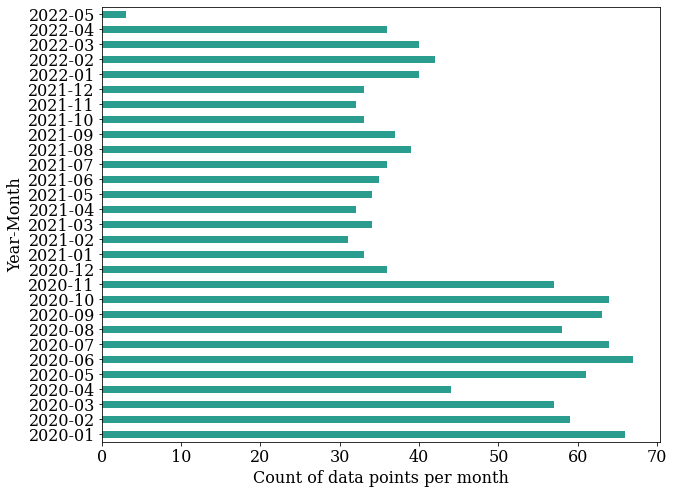

<IPython.core.display.Javascript object>

In [69]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [70]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-5 has the minimum number of days with samples - 3
2020-6 has the maximum number of days with samples - 67


<IPython.core.display.Javascript object>

In [71]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 58, 2021: 34, 2022: 32}

Mean number of observations - all years
43


<IPython.core.display.Javascript object>

In [72]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  659.000000
mean     1.921093
std      0.843261
min      1.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      3.000000

<IPython.core.display.Javascript object>

In [73]:
day_counts[["DayCount"]].value_counts()

DayCount
1           262
3           210
2           187
dtype: int64

<IPython.core.display.Javascript object>

In [74]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
1    2020      1    3         3
2    2020      1    6         3
3    2020      1    7         3
4    2020      1    8         3
5    2020      1    9         3
..    ...    ...  ...       ...
609  2022      3    2         3
610  2022      3    4         3
612  2022      3    7         3
623  2022      3   21         3
625  2022      3   23         3

[210 rows x 4 columns]

<IPython.core.display.Javascript object>

In [75]:
df_copy["Year"] = df_copy["Date"].dt.year
df_copy["Month"] = df_copy["Date"].dt.month
df_copy["Day"] = df_copy["Date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = (
        df_merge[df_merge["DayCount"] == daycount]["28 day Compressive strength"]
        .isna()
        .sum()
    )
    print(daycount, nulls)

1 7
2 16
3 9


<IPython.core.display.Javascript object>

In [76]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [77]:
# Average Frequency
np.mean(diffs)

Timedelta('0 days 16:08:43.636363636')

<IPython.core.display.Javascript object>

In [78]:
Counter(diffs)

Counter({Timedelta('1 days 00:00:00'): 735,
         Timedelta('3 days 00:00:00'): 175,
         Timedelta('2 days 00:00:00'): 269,
         Timedelta('4 days 00:00:00'): 47,
         Timedelta('5 days 00:00:00'): 14,
         Timedelta('6 days 00:00:00'): 7,
         Timedelta('-852 days +00:00:00'): 1,
         Timedelta('7 days 00:00:00'): 4,
         Timedelta('8 days 00:00:00'): 2,
         Timedelta('131 days 00:00:00'): 1,
         Timedelta('68 days 00:00:00'): 1,
         Timedelta('30 days 00:00:00'): 1,
         Timedelta('11 days 00:00:00'): 2,
         Timedelta('14 days 00:00:00'): 2,
         Timedelta('93 days 00:00:00'): 1,
         Timedelta('9 days 00:00:00'): 1,
         Timedelta('12 days 00:00:00'): 1,
         Timedelta('-832 days +00:00:00'): 1})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='count'>

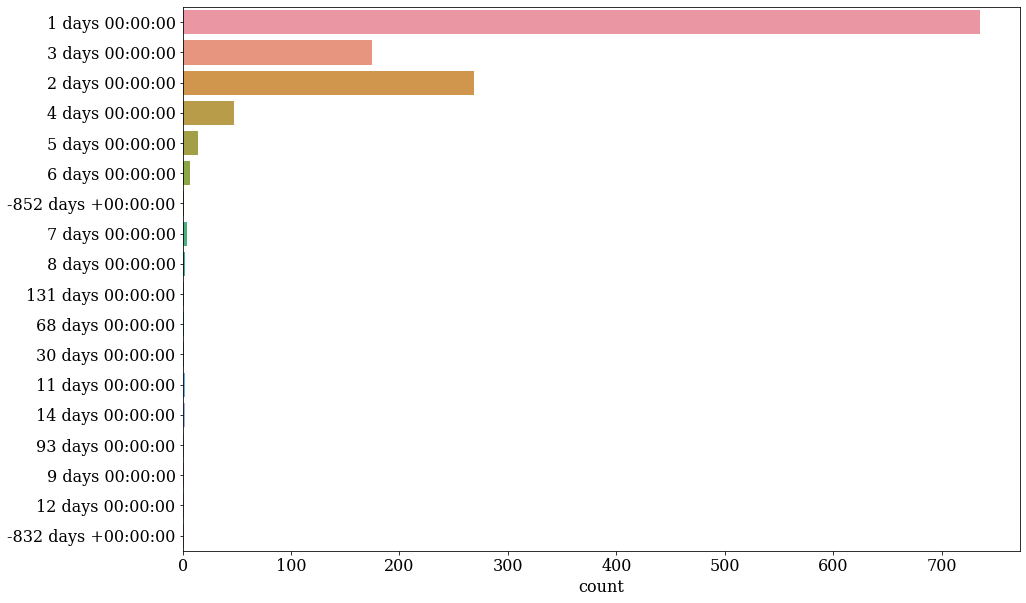

<IPython.core.display.Javascript object>

In [79]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [80]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[58.06,
 13.82,
 21.25,
 3.71,
 1.11,
 0.55,
 0.08,
 0.32,
 0.16,
 0.08,
 0.08,
 0.08,
 0.16,
 0.16,
 0.08,
 0.08,
 0.08,
 0.08]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='count'>

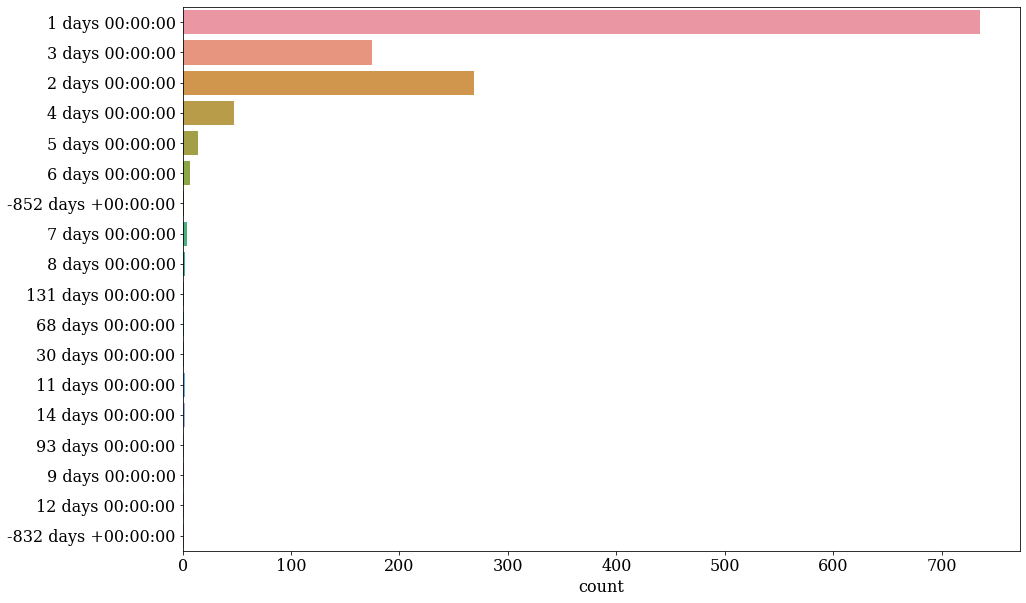

<IPython.core.display.Javascript object>

In [81]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

### Compressive Strength Distribution

#### 1 Days

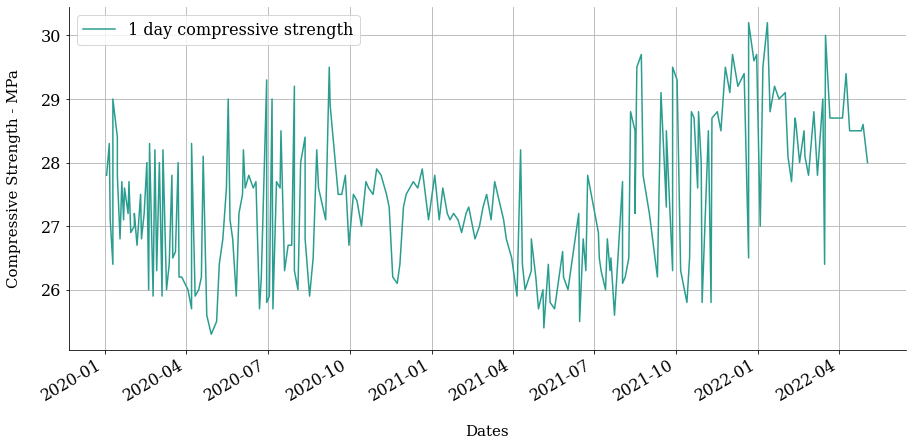

<IPython.core.display.Javascript object>

In [82]:
tmp = df[["Production", "1 day Compressive strength"]].dropna().copy()
tmp["Production"] = pd.to_datetime(tmp["Production"], format="%d/%m/%Y")
tmp = tmp.rename({"Production": "Date"}, axis=1)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 3 Days

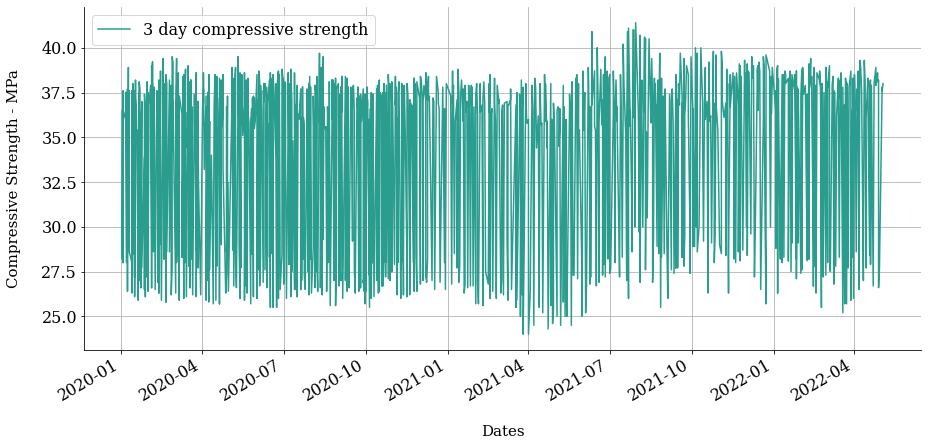

<IPython.core.display.Javascript object>

In [83]:
tmp = df[["Production", "3 day Compressive strength"]].dropna().copy()
tmp["Production"] = pd.to_datetime(tmp["Production"], format="%d/%m/%Y")
tmp = tmp.rename({"Production": "Date"}, axis=1)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 7 Days

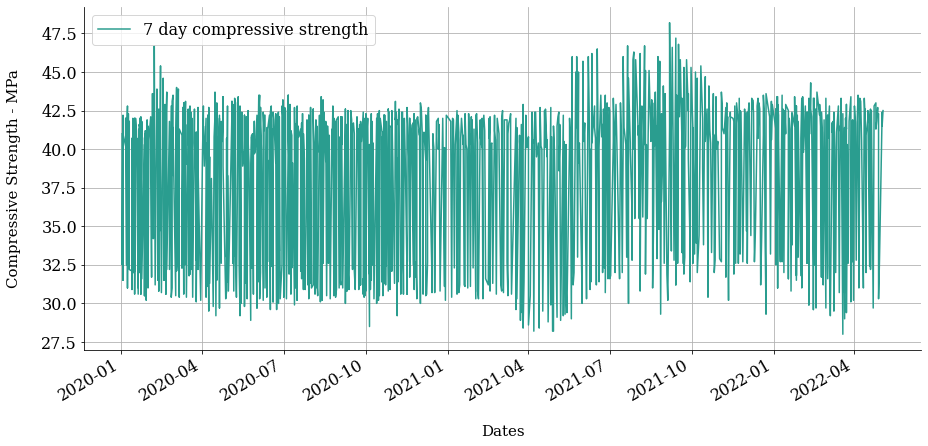

<IPython.core.display.Javascript object>

In [84]:
tmp = df[["Production", "7 day Compressive strength"]].dropna().copy()
tmp["Production"] = pd.to_datetime(tmp["Production"], format="%d/%m/%Y")
tmp = tmp.rename({"Production": "Date"}, axis=1)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 28 Days

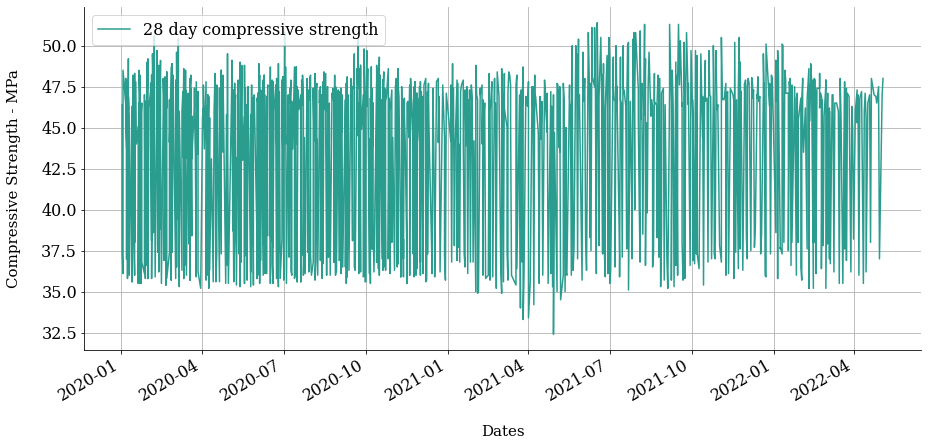

<IPython.core.display.Javascript object>

In [85]:
tmp = df[["Production", "28 day Compressive strength"]].dropna().copy()
tmp["Production"] = pd.to_datetime(tmp["Production"], format="%d/%m/%Y")
tmp = tmp.rename({"Production": "Date"}, axis=1)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

## 5. Intersection of missing by cement type

### 5.1 Cimento CPIIF40

In [86]:
df_cpiif40 = df[df["Remarks"] == "CPIIF40 Expedido"]

<IPython.core.display.Javascript object>

### 5.2 Cimento CPIIF32

In [87]:
df_cpiif32 = df[df["Remarks"] == "CPIIF32 Expedido"]

<IPython.core.display.Javascript object>

### 5.3 Cimento CPVARI

In [88]:
df_cpvari = df[df["Remarks"] == "CPVARI Expedido"]

<IPython.core.display.Javascript object>

# All cements by cement Type

### Intersection os variables with missing

In [89]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc_1 = df_cpiif40.isnull().sum() / df_cpiif40.shape[0] * 100
miss_perc_2 = df_cpiif32.isnull().sum() / df_cpiif32.shape[0] * 100
miss_perc_3 = df_cpvari.isnull().sum() / df_cpvari.shape[0] * 100

miss_perc.name = "All"
miss_perc_1.name = "CPIIF40"
miss_perc_2.name = "CPIIF32"
miss_perc_3.name = "CPVARI"

<IPython.core.display.Javascript object>

In [90]:
miss_perc[miss_perc >= 40]

TiO2                          99.921011
Ca(OH)2                       99.921011
CaCO3                         99.921011
Langbeinite                   69.273302
1 day Compressive strength    81.753555
Name: All, dtype: float64

<IPython.core.display.Javascript object>

In [91]:
miss_perc_1[miss_perc_1 >= 40]

TiO2                           99.836334
Ca(OH)2                        99.836334
CaCO3                          99.836334
Belite total                   40.425532
Langbeinite                    69.558101
1 day Compressive strength    100.000000
Name: CPIIF40, dtype: float64

<IPython.core.display.Javascript object>

In [92]:
miss_perc_2[miss_perc_2 >= 40]

TiO2                          100.000000
Ca(OH)2                       100.000000
CaCO3                         100.000000
Langbeinite                    68.646081
1 day Compressive strength    100.000000
#400                          100.000000
Name: CPIIF32, dtype: float64

<IPython.core.display.Javascript object>

In [93]:
miss_perc_3[miss_perc_3 >= 40]

TiO2           100.00000
Ca(OH)2        100.00000
CaCO3          100.00000
Langbeinite     69.65812
Name: CPVARI, dtype: float64

<IPython.core.display.Javascript object>

In [94]:
for m in [miss_perc, miss_perc_1, miss_perc_2, miss_perc_3]:
    for n in [miss_perc, miss_perc_1, miss_perc_2, miss_perc_3]:
        if m.name == n.name:
            continue
        else:
            print(m.name, "-", n.name)
            print(set(m[m >= 40].keys()) - set(n[n >= 40].keys()))
            print()
            print(n.name, "-", m.name)
            print(set(n[n >= 40].keys()) - set(m[m >= 40].keys()))
            print("---------------")
            print()

All - CPIIF40
set()

CPIIF40 - All
{'Belite total'}
---------------

All - CPIIF32
set()

CPIIF32 - All
{'#400'}
---------------

All - CPVARI
{'1 day Compressive strength'}

CPVARI - All
set()
---------------

CPIIF40 - All
{'Belite total'}

All - CPIIF40
set()
---------------

CPIIF40 - CPIIF32
{'Belite total'}

CPIIF32 - CPIIF40
{'#400'}
---------------

CPIIF40 - CPVARI
{'Belite total', '1 day Compressive strength'}

CPVARI - CPIIF40
set()
---------------

CPIIF32 - All
{'#400'}

All - CPIIF32
set()
---------------

CPIIF32 - CPIIF40
{'#400'}

CPIIF40 - CPIIF32
{'Belite total'}
---------------

CPIIF32 - CPVARI
{'#400', '1 day Compressive strength'}

CPVARI - CPIIF32
set()
---------------

CPVARI - All
set()

All - CPVARI
{'1 day Compressive strength'}
---------------

CPVARI - CPIIF40
set()

CPIIF40 - CPVARI
{'Belite total', '1 day Compressive strength'}
---------------

CPVARI - CPIIF32
set()

CPIIF32 - CPVARI
{'#400', '1 day Compressive strength'}
---------------



<IPython.core.display.Javascript object>